In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [351]:
df = pd.read_csv("../data/BMSdataset/final_foresland.csv")
display(df)

,Unnamed: 0,Country,Product,Date,MonthlyTreatment,YrexMonthlyTreatment,Value,Indication,Sub-Indication,PatientsDescribed,YrexPatientsDescribed
0,0,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication 20,Indication 20,0.036738,0.020889
1,1,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication 14,Indication 14,0.000000,0.000000
2,2,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication 12,Indication 12,0.107965,0.001071
3,3,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication 1,Indication 1,0.000000,0.075094
4,4,Floresland,INNOVIX,2020-08-01,7135.442800,8755.65000,3657300,Indication 23,Indication 23,0.159120,0.020139
...,...,...,...,...,...,...,...,...,...,...,...
523,523,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication 19,Indication 19,0.288206,NaN
524,524,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication 9,Indication 9,0.035901,0.004417
525,525,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication 10,Indication 10,0.088251,0.004532
526,526,Floresland,INNOVIX,2024-07-01,9653.302392,28975.41165,4932260,Indication 2,Indication 2-a,0.067962,0.050173


In [352]:
Floresland_path = "../data/BMSdataset/INNOVIX_Floresland.xlsx"

foresland_share_of_voice = pd.read_excel(Floresland_path, sheet_name='Share of Voice')
# foresland_new_patient_share = pd.read_excel(Floresland_path, sheet_name='New patient share')

In [353]:
foresland_share_of_voice_innovix = foresland_share_of_voice[foresland_share_of_voice["Product"] == "INNOVIX"]
foresland_share_of_voice_yrex = foresland_share_of_voice[foresland_share_of_voice["Product"] == "YREX"]

merged_df = pd.merge(foresland_share_of_voice_innovix, foresland_share_of_voice_yrex, how='inner', on=['Date', 'Indication'])
selected_df = merged_df[["Indication", "Date", "Value_x", "Value_y"]]

selected_df = selected_df.rename(columns={'Value_x': 'Share', 'Value_y': 'yrexShare'})

df['Date'] = pd.to_datetime(df['Date'])
selected_df['Date'] = pd.to_datetime(selected_df['Date'])


# df_ye = pd.merge(df, selected_df, how='inner', on=['Date', 'Indication'])

# display(df_ye)

In [354]:
display(selected_df)

,Indication,Date,Share,yrexShare
0,Indication 1,2020-01-01,0.086294,0.913706
1,Indication 1,2020-02-01,0.000000,1.000000
2,Indication 1,2020-05-01,0.000000,1.000000
3,Indication 1,2020-06-01,0.000000,1.000000
4,Indication 1,2020-07-01,0.000000,1.000000
...,...,...,...,...
315,Indication 23,2024-03-01,0.216216,0.197789
316,Indication 23,2024-04-01,0.257371,0.285857
317,Indication 23,2024-05-01,0.140581,0.208060
318,Indication 23,2024-06-01,0.157253,0.284230


In [355]:
df = df[~(((df['Indication'] == 'Indication 15') & (df['Sub-Indication'] == 'Indication 15')) |((df['Indication'] == 'Indication 19') & (df['Sub-Indication'] == 'Indication 19')))]



In [356]:
df = df.drop(labels=["Country", "Product", df.columns[0]], axis=1).set_index("Date")
display(df)

,MonthlyTreatment,YrexMonthlyTreatment,Value,Indication,Sub-Indication,PatientsDescribed,YrexPatientsDescribed
Date,,,,,,,
2020-08-01,7135.442800,8755.65000,3657300,Indication 20,Indication 20,0.036738,0.020889
2020-08-01,7135.442800,8755.65000,3657300,Indication 14,Indication 14,0.000000,0.000000
2020-08-01,7135.442800,8755.65000,3657300,Indication 12,Indication 12,0.107965,0.001071
2020-08-01,7135.442800,8755.65000,3657300,Indication 1,Indication 1,0.000000,0.075094
2020-08-01,7135.442800,8755.65000,3657300,Indication 23,Indication 23,0.159120,0.020139
...,...,...,...,...,...,...,...
2024-07-01,9653.302392,28975.41165,4932260,Indication 23,Indication 23,0.167442,0.049469
2024-07-01,9653.302392,28975.41165,4932260,Indication 9,Indication 9,0.035901,0.004417
2024-07-01,9653.302392,28975.41165,4932260,Indication 10,Indication 10,0.088251,0.004532


In [357]:
def generate_column_names(df):
    column_names = []
    for indication, subindication in df[["Indication", "Sub-Indication"]].apply(tuple, axis=1).unique():
        column_names.append(f"{indication} - {subindication}")
    return column_names
    

In [358]:
columns = ["MonthlyTreatment", "Value", *generate_column_names(df)]
df_pivoted = pd.DataFrame(columns=columns)

In [359]:
for index, row in df.iterrows():
    column_name = f"{row['Indication']} - {row['Sub-Indication']}"
    value = float(row["PatientsDescribed"])
    if index in df_pivoted.index:
        df_pivoted.loc[index, column_name] = value # Update value if index exists
    else:
        # Add a new row with NaN for all other columns and set the new value
        df_pivoted.loc[index] = pd.Series({col: (value if col == column_name else 0.0 ) for col in df_pivoted.columns})
        df_pivoted.loc[index, "MonthlyTreatment"] = float(row["MonthlyTreatment"])
        df_pivoted.loc[index, "Value"] = float(row["Value"])
        df_pivoted.loc[index, "YrexMonthlyTreatment"] = float(row["YrexMonthlyTreatment"])

In [360]:
for indication in df["Indication"].unique():
    df_pivoted[indication] = 0
    df_pivoted[f"yrex{indication}"] = 0

In [361]:
display(df_pivoted)

,MonthlyTreatment,Value,Indication 20 - Indication 20,Indication 14 - Indication 14,Indication 12 - Indication 12,Indication 1 - Indication 1,Indication 23 - Indication 23,Indication 9 - Indication 9,Indication 10 - Indication 10,Indication 2 - Indication 2-a,...,Indication 1,yrexIndication 1,Indication 23,yrexIndication 23,Indication 9,yrexIndication 9,Indication 10,yrexIndication 10,Indication 2,yrexIndication 2
2020-08-01,7135.442800,3657300.0,0.036738,0.000000,0.107965,0.000000,0.159120,0.000000,0.000000,0.074797,...,0,0,0,0,0,0,0,0,0,0
2020-09-01,7825.007000,3970760.0,0.041275,0.000000,0.095040,0.000000,0.233350,0.000000,0.000000,0.038112,...,0,0,0,0,0,0,0,0,0,0
2020-10-01,8191.023900,4102640.0,0.028784,0.000000,0.108166,0.000000,0.188553,0.000000,0.000000,0.085333,...,0,0,0,0,0,0,0,0,0,0
2020-11-01,7232.573000,3661520.0,0.034917,0.000000,0.102501,0.000000,0.195321,0.000000,0.000000,0.086446,...,0,0,0,0,0,0,0,0,0,0
2020-12-01,7152.792700,3601940.0,0.028764,0.000000,0.081230,0.000000,0.224823,0.000000,0.000000,0.051887,...,0,0,0,0,0,0,0,0,0,0
2021-01-01,8835.918200,4452420.0,0.031276,0.000000,0.103094,0.000000,0.210281,0.000000,0.000000,0.066319,...,0,0,0,0,0,0,0,0,0,0
2021-02-01,6574.143200,3362140.0,0.032556,0.000000,0.108209,0.000000,0.188993,0.000000,0.000000,0.075326,...,0,0,0,0,0,0,0,0,0,0
2021-03-01,8410.040900,4280840.0,0.017403,0.000000,0.130749,0.000000,0.190532,0.000000,0.000000,0.076420,...,0,0,0,0,0,0,0,0,0,0
2021-04-01,7323.121100,3778260.0,0.022109,0.001935,0.085051,0.015433,0.192356,0.001935,0.000000,0.082293,...,0,0,0,0,0,0,0,0,0,0
2021-05-01,7395.975800,3836240.0,0.044048,0.015620,0.107287,0.018684,0.167440,0.001005,0.000000,0.099247,...,0,0,0,0,0,0,0,0,0,0


In [362]:
for index, row in selected_df.iterrows():
    indication = row["Indication"]
    date = row["Date"]

    df_pivoted.loc[date, indication] = row["Share"]
    df_pivoted.loc[date, f"yrex{indication}"] = row["yrexShare"]

    
    
    

In [365]:
df_pivoted = df_pivoted.iloc[:-7]
df_pivoted = df_pivoted.drop("Indication 9", axis=1)
df_pivoted = df_pivoted.drop("yrexIndication 9", axis=1)

In [366]:
display(df_pivoted)

,MonthlyTreatment,Value,Indication 20 - Indication 20,Indication 14 - Indication 14,Indication 12 - Indication 12,Indication 1 - Indication 1,Indication 23 - Indication 23,Indication 9 - Indication 9,Indication 10 - Indication 10,Indication 2 - Indication 2-a,...,Indication 1,yrexIndication 1,Indication 23,yrexIndication 23,Indication 10,yrexIndication 10,Indication 2,yrexIndication 2,Indication 19,yrexIndication 19
2020-08-01,7135.442800,3657300.0,0.036738,0.000000,0.107965,0.000000,0.159120,0.000000,0.000000,0.074797,...,0.000000,0.708763,0.203883,0.108738,0.000000,0.000000,0.563107,0.145631,0.111969,0.108986
2020-09-01,7825.007000,3970760.0,0.041275,0.000000,0.095040,0.000000,0.233350,0.000000,0.000000,0.038112,...,0.000000,1.000000,0.261646,0.167198,0.000000,0.500000,0.239336,0.234597,0.163346,0.146103
2020-10-01,8191.023900,4102640.0,0.028784,0.000000,0.108166,0.000000,0.188553,0.000000,0.000000,0.085333,...,0.000000,1.000000,0.240444,0.224000,0.000000,0.000000,0.331320,0.036238,0.115219,0.176026
2020-11-01,7232.573000,3661520.0,0.034917,0.000000,0.102501,0.000000,0.195321,0.000000,0.000000,0.086446,...,0.000000,0.572519,0.359738,0.117332,0.000000,0.000000,0.406400,0.062400,0.060243,0.145726
2020-12-01,7152.792700,3601940.0,0.028764,0.000000,0.081230,0.000000,0.224823,0.000000,0.000000,0.051887,...,0.000000,0.511111,0.226607,0.000000,0.598485,0.000000,0.318815,0.038328,0.122987,0.171062
2021-01-01,8835.918200,4452420.0,0.031276,0.000000,0.103094,0.000000,0.210281,0.000000,0.000000,0.066319,...,0.000000,0.500000,0.214125,0.102179,0.000000,0.000000,0.431500,0.130475,0.131347,0.103338
2021-02-01,6574.143200,3362140.0,0.032556,0.000000,0.108209,0.000000,0.188993,0.000000,0.000000,0.075326,...,0.251534,0.000000,0.417910,0.040796,0.000000,0.000000,0.399860,0.000000,0.114309,0.141721
2021-03-01,8410.040900,4280840.0,0.017403,0.000000,0.130749,0.000000,0.190532,0.000000,0.000000,0.076420,...,0.129597,0.129597,0.305201,0.032385,0.000000,0.000000,0.259177,0.204672,0.170018,0.109232
2021-04-01,7323.121100,3778260.0,0.022109,0.001935,0.085051,0.015433,0.192356,0.001935,0.000000,0.082293,...,0.000000,0.000000,0.278481,0.099520,0.000000,0.612245,0.524738,0.190405,0.091166,0.155977
2021-05-01,7395.975800,3836240.0,0.044048,0.015620,0.107287,0.018684,0.167440,0.001005,0.000000,0.099247,...,0.148620,0.000000,0.266953,0.224034,0.000000,0.000000,0.406015,0.047619,0.167183,0.173817


In [ ]:
# NORMALIZATION

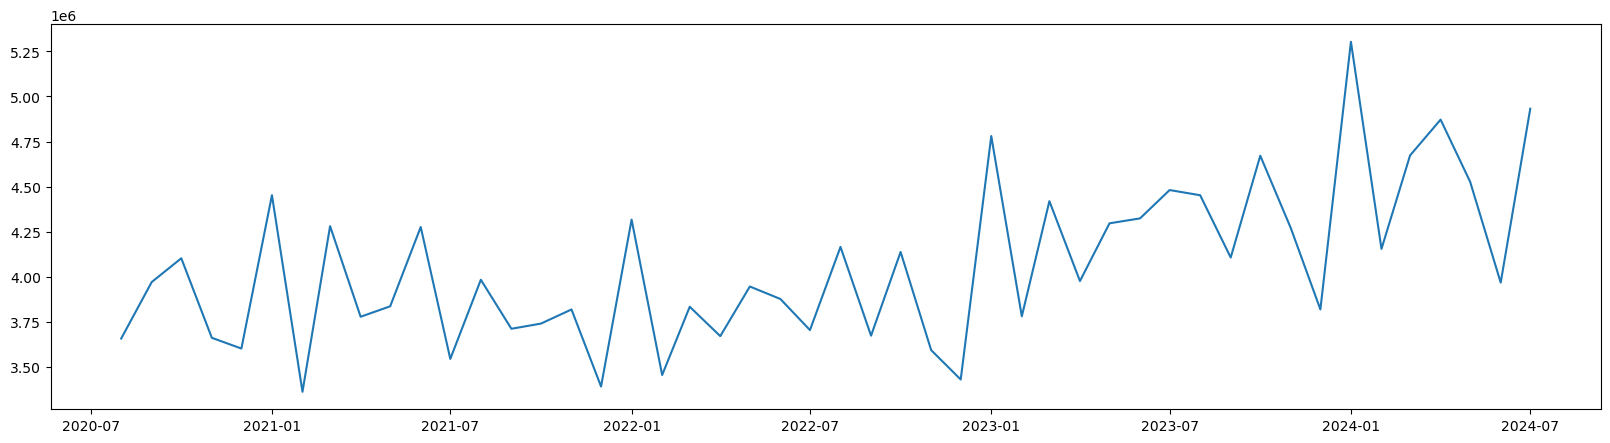

In [369]:
# Check seasonality of the data
plt.figure(figsize=(20,5))
plt.plot(df_pivoted["Value"])
plt.show()

In [ ]:
result = adfuller(df_pivoted['Value'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")

In [370]:
from statsmodels.tsa.api import VAR

# Fit the VAR model
model = VAR(df_pivoted)

# Fit the model with a maximum lag of 5 (you can adjust this depending on your analysis)
results = model.fit(maxlags=5)

# print(results.summary())

# Forecast the next 24 months (steps)
forecast = results.forecast(df_pivoted.values[-5:], steps=24)

# Print the forecasted values
print(forecast)

[[ 9.06030074e+03  4.51408833e+06  4.33211273e-03  2.91794196e-02
   9.18949746e-02  4.17998531e-02  1.55673275e-01  5.53651398e-02
   5.33341941e-02  7.97512423e-02  2.32483588e-01  2.59100998e+04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.18086886e-02  6.44474807e-02  1.89368810e-01  4.24396284e-01
   3.74558486e-01  3.17615558e-01  3.70746290e-01 -3.18965770e-01
   4.81195521e-01  1.91968253e-01  1.90296807e-01  1.88702162e-01]
 [ 8.05855318e+03  4.21834374e+06  1.51182193e-02  1.30381907e-02
   6.81608459e-02  5.18672543e-02  1.55496673e-01  5.17304826e-02
   5.34043558e-02  8.41461964e-02  1.67989185e-01  2.63448011e+04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.05605055e-01  7.40125060e-02  3.39494772e-01  1.91079751e-01
   1.66390017e-01  2.56174419e-01  8.42864674e-01  5.82246355e-01
  -1.52539473e-01  1.96326296e-01  1.66192722e-01  1.16529268e-01]
 [ 9.38365922e+03  4.99612724e+06  1.62753406e-03  9.65577188e-03
   3.191

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


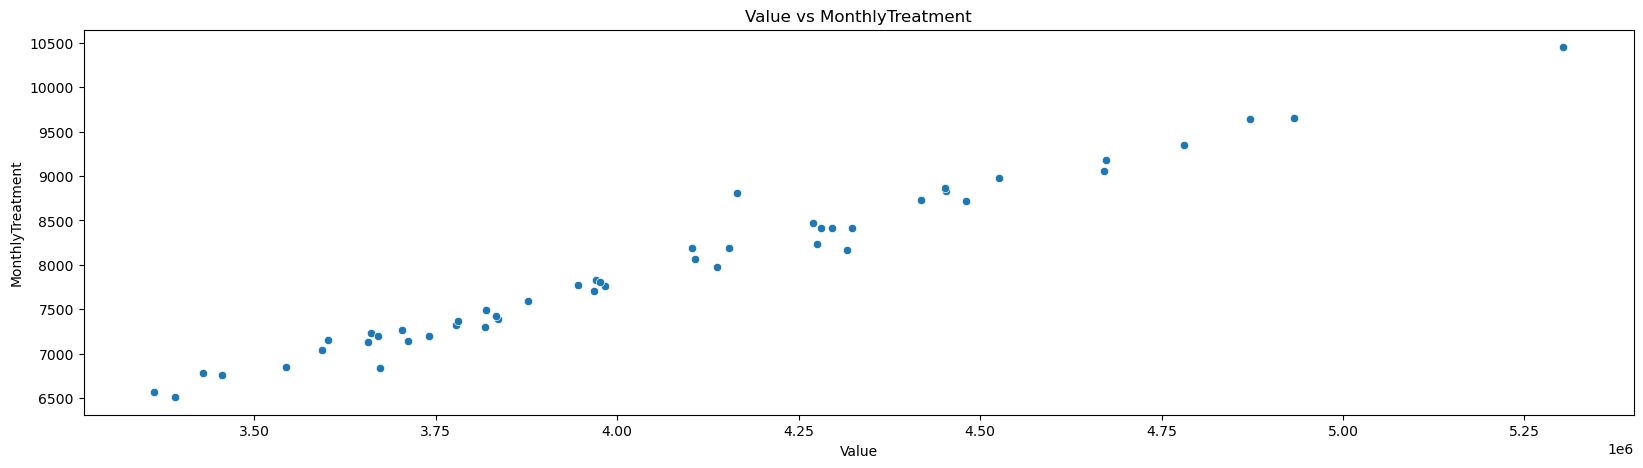

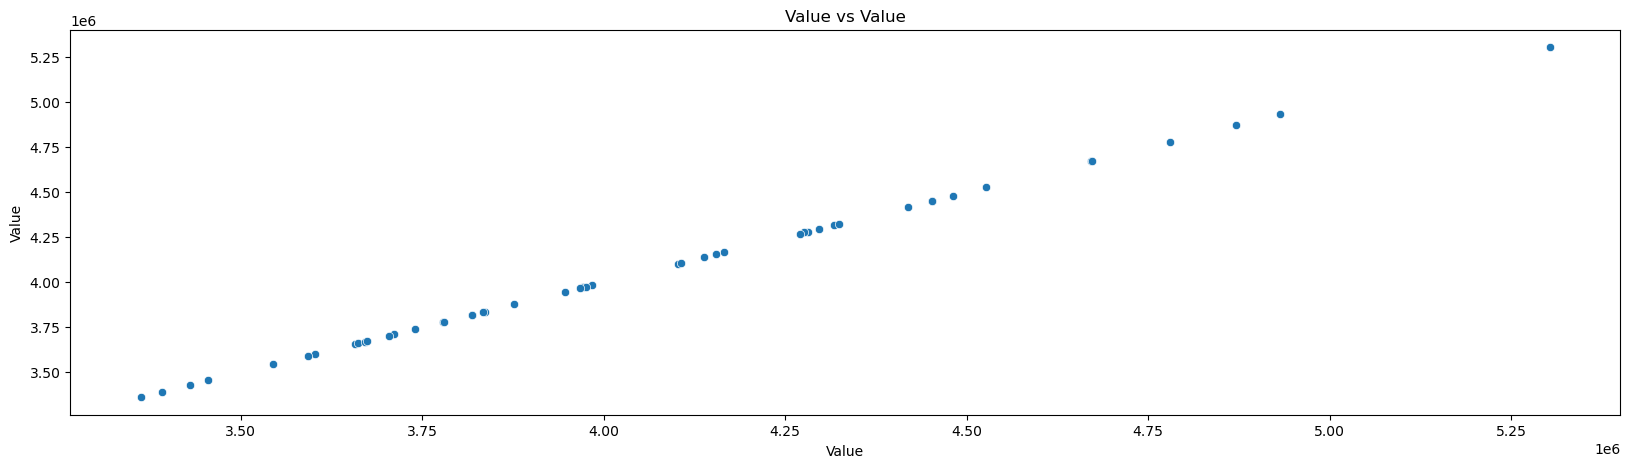

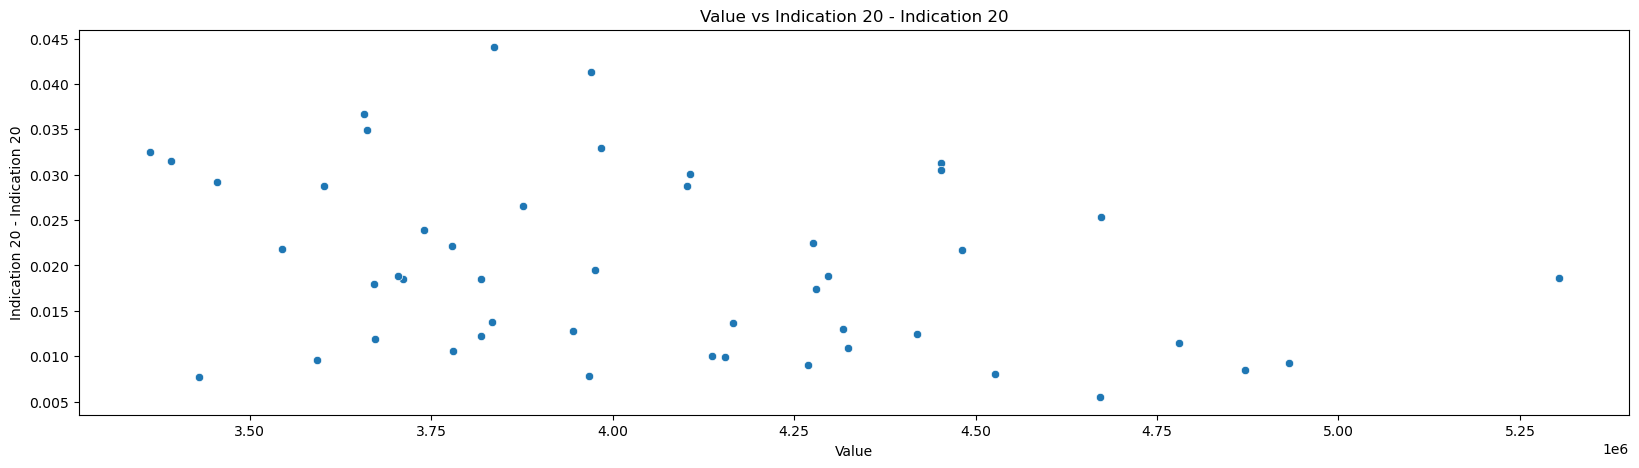

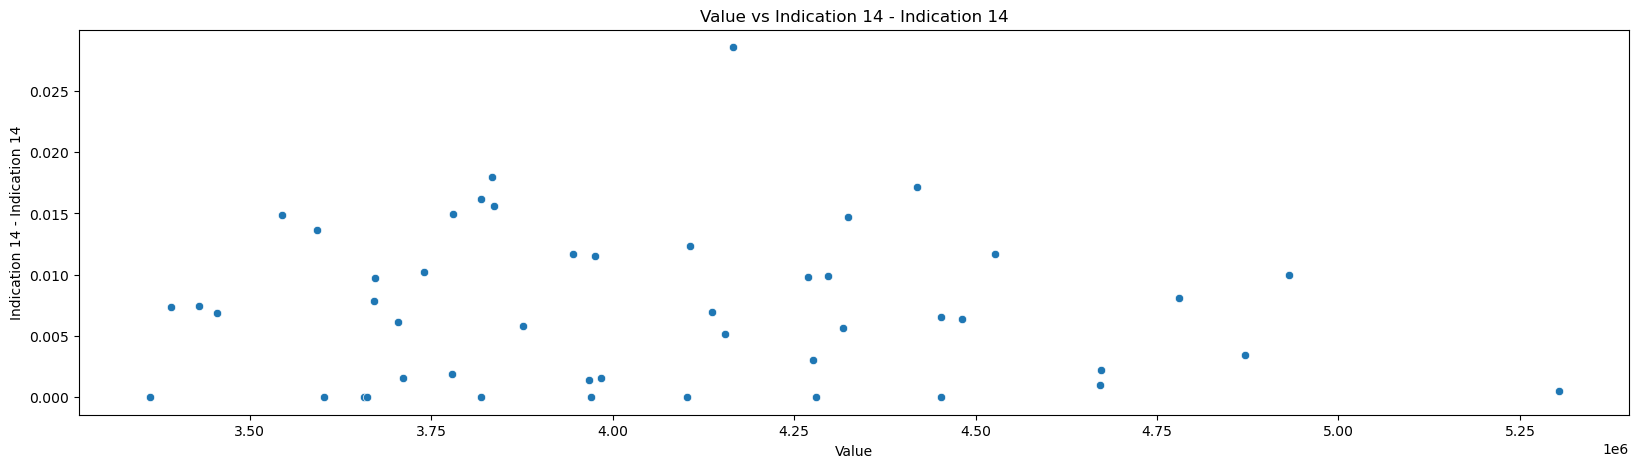

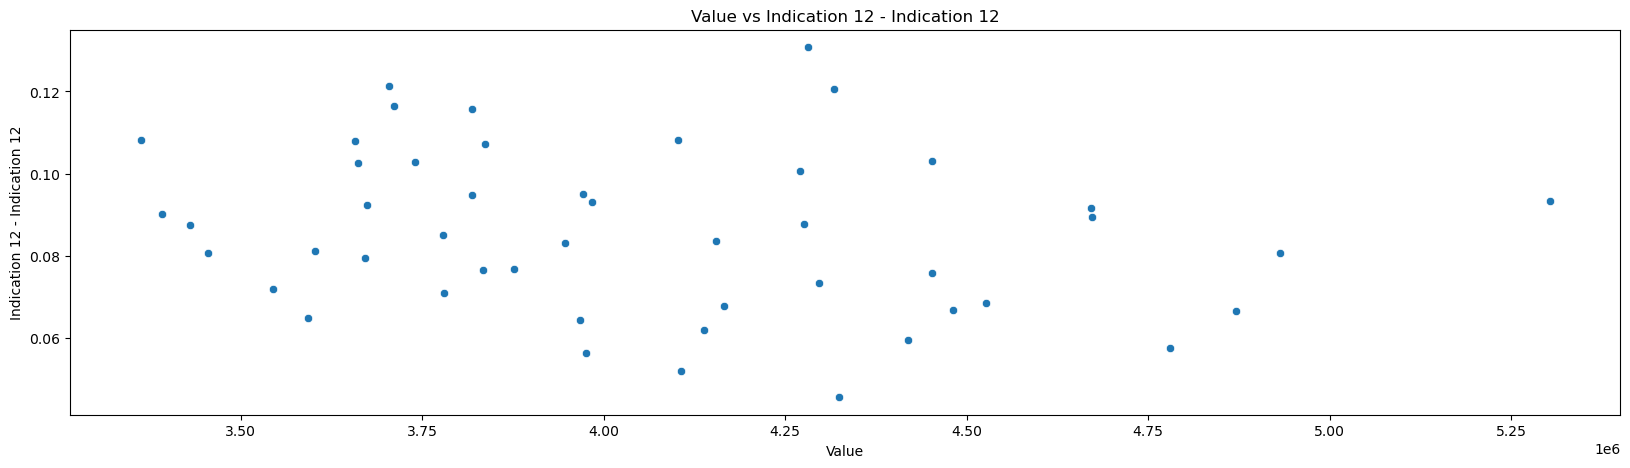

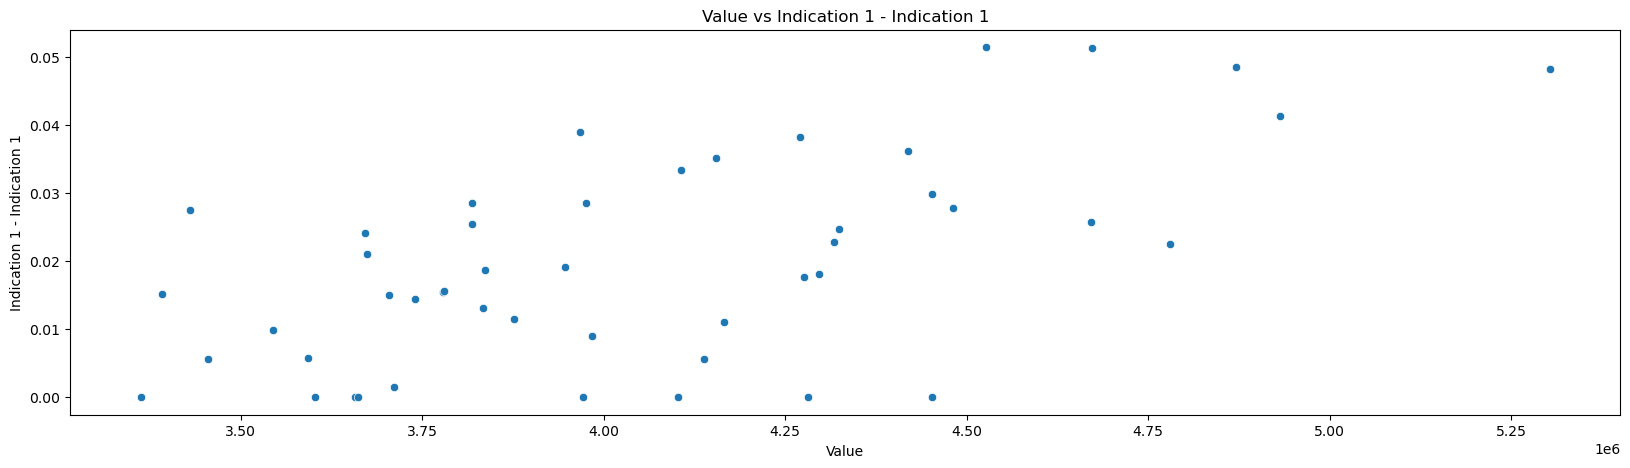

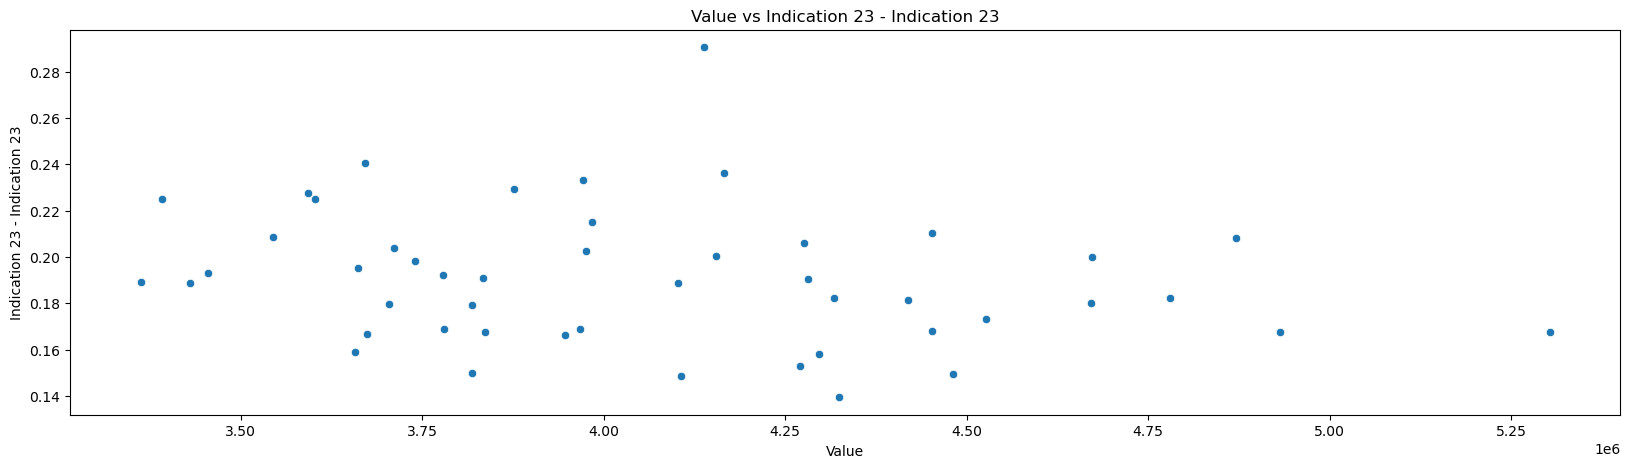

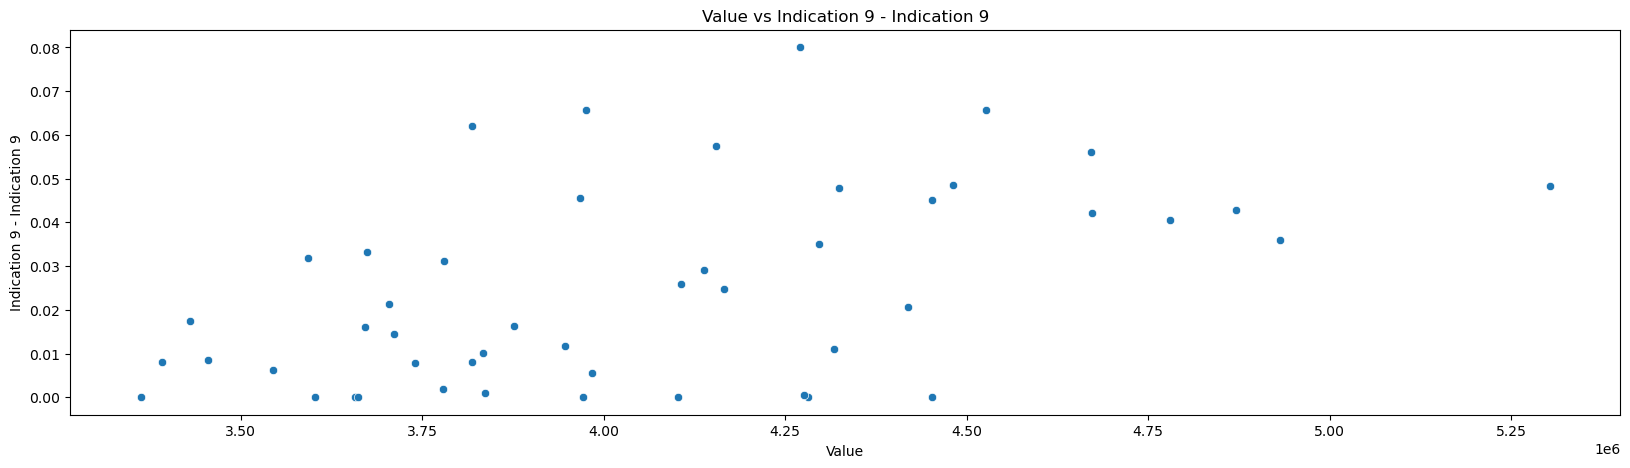

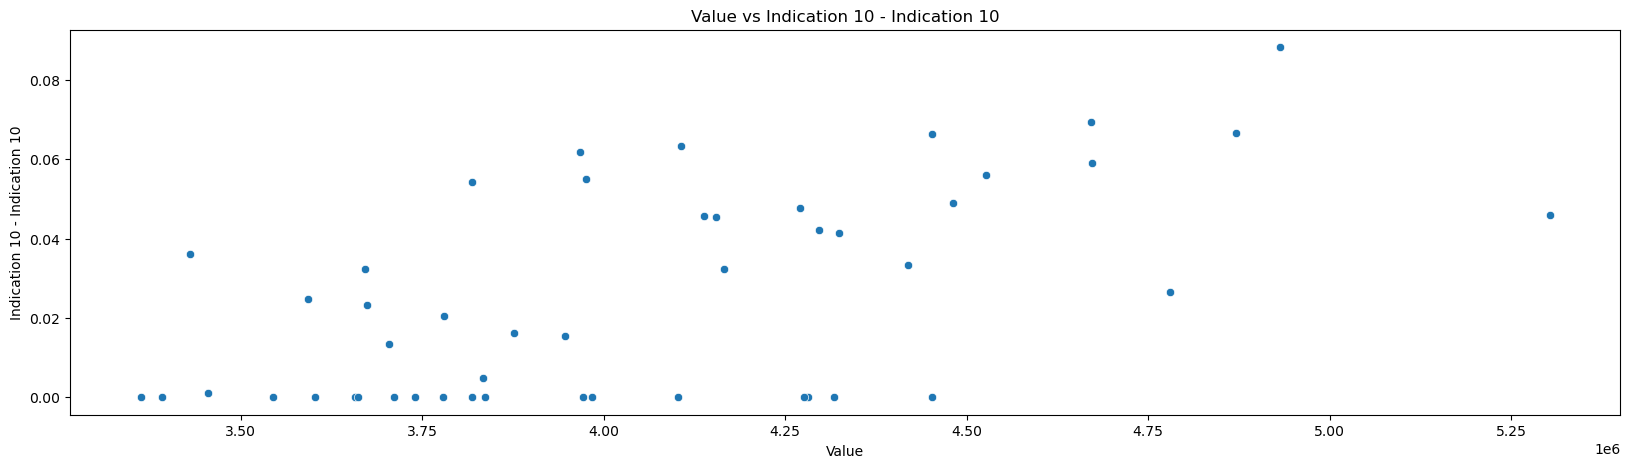

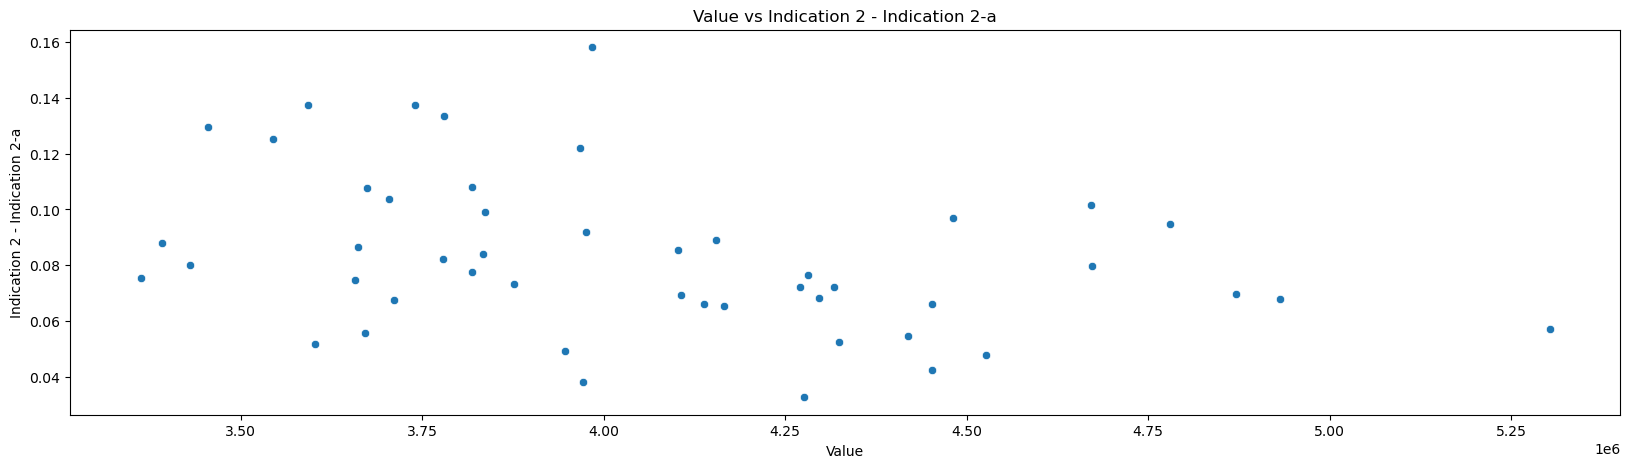

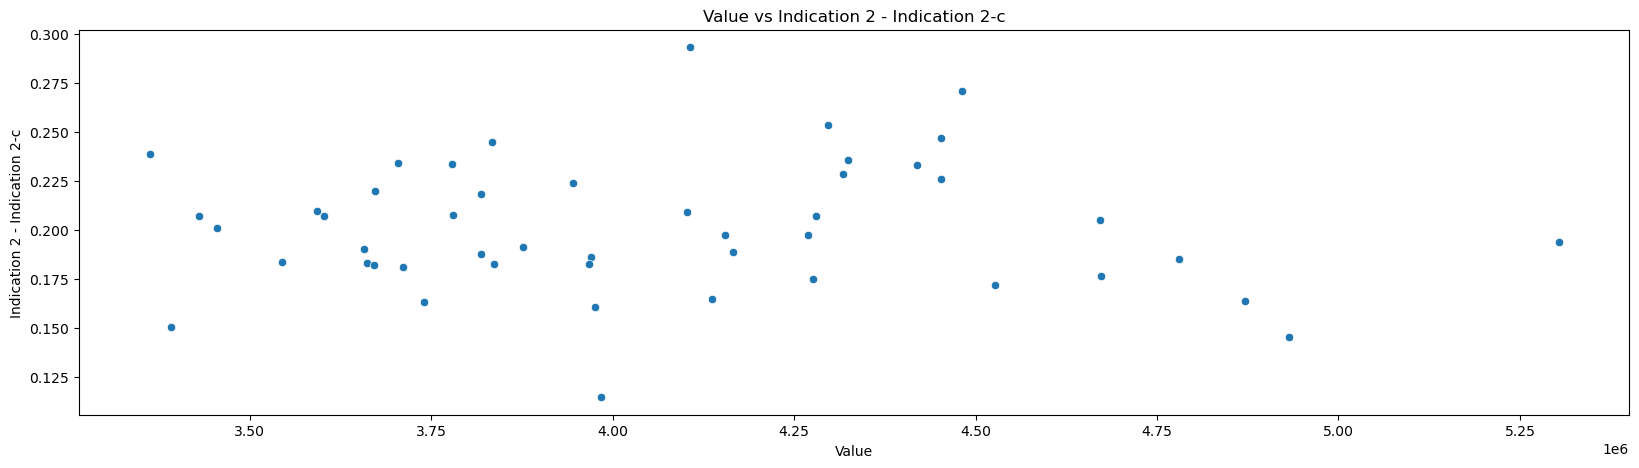

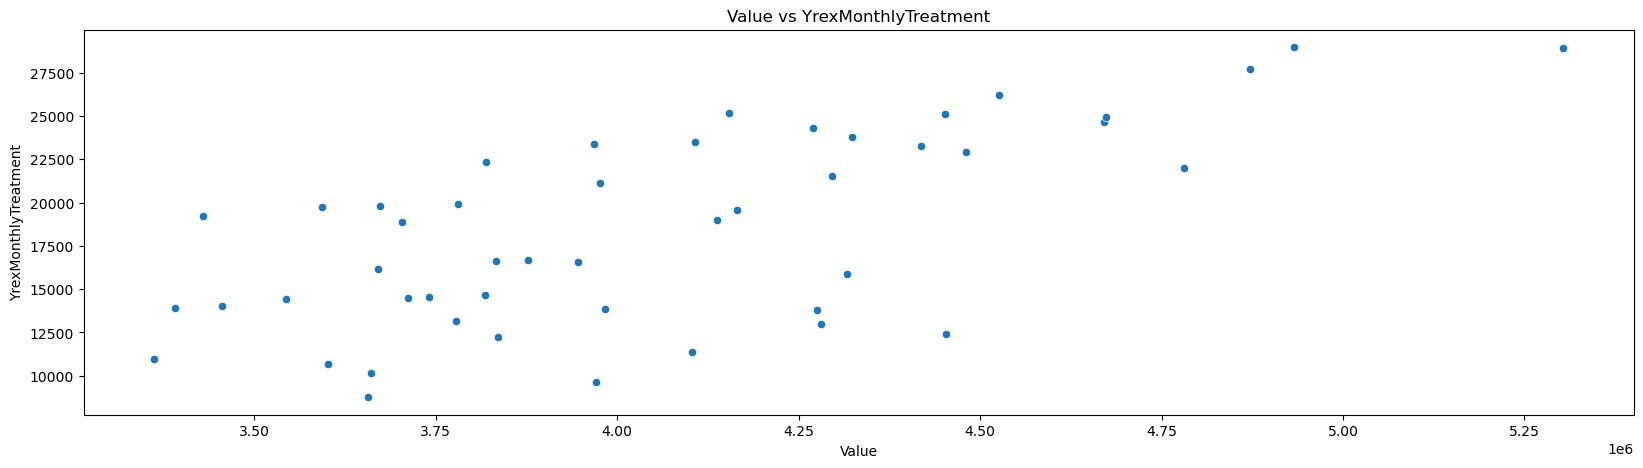

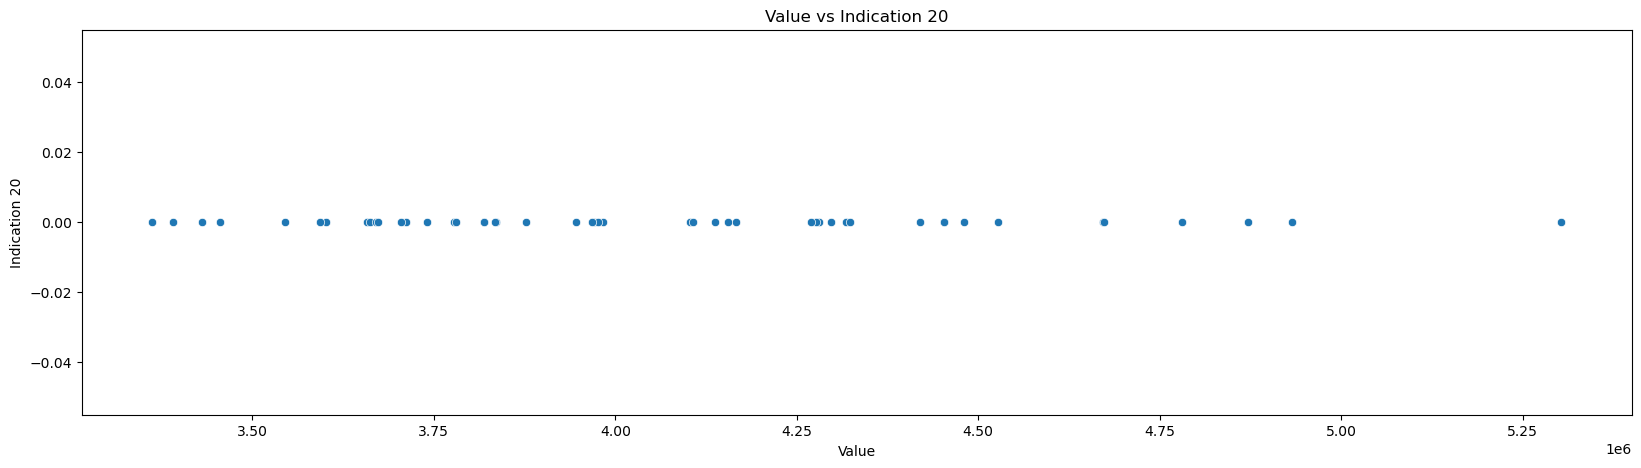

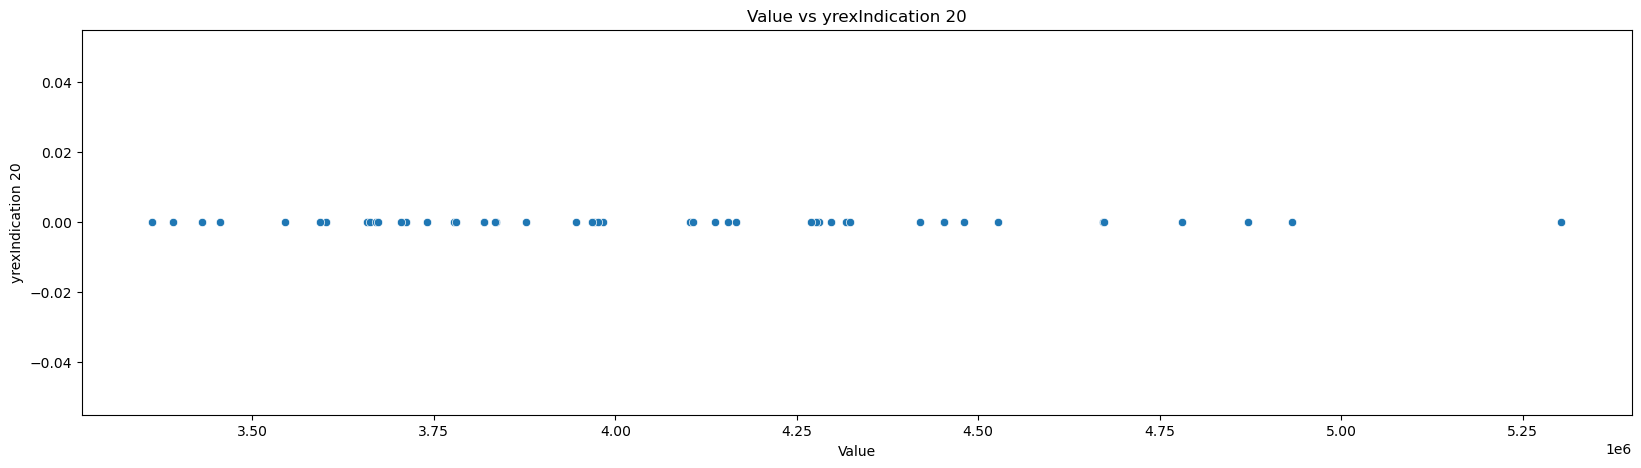

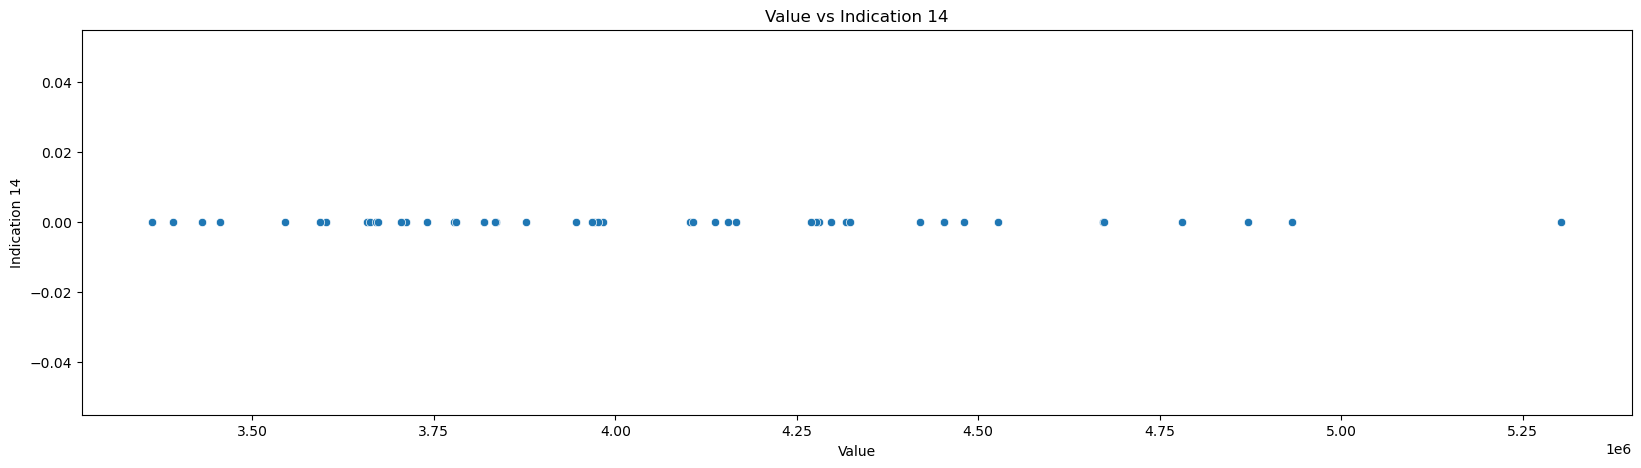

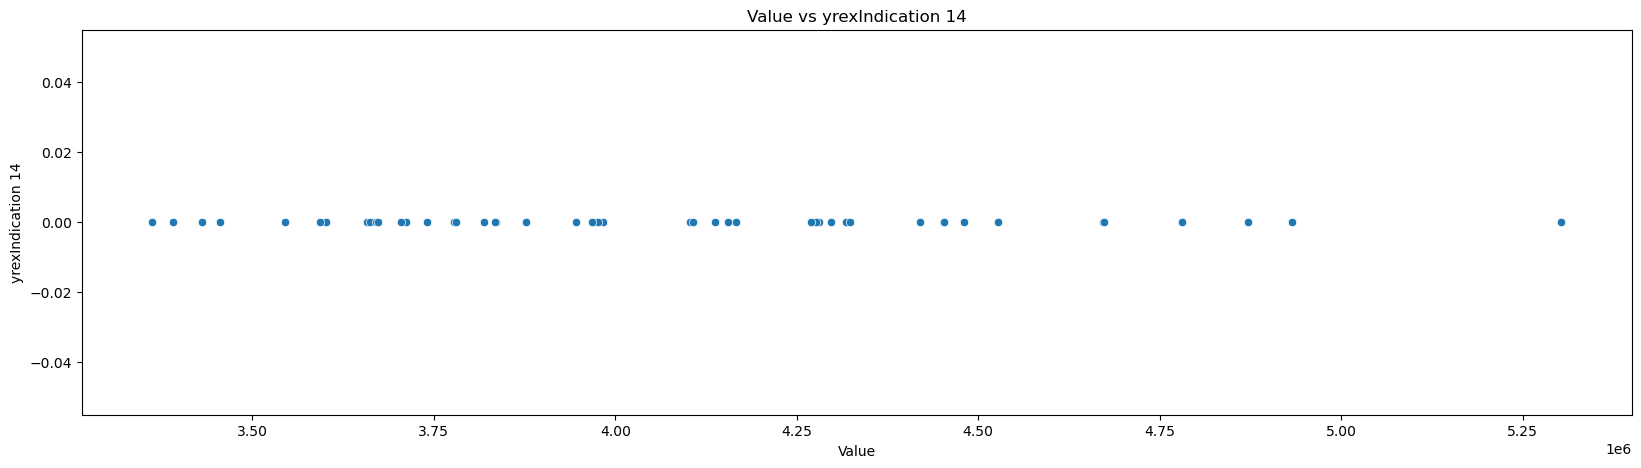

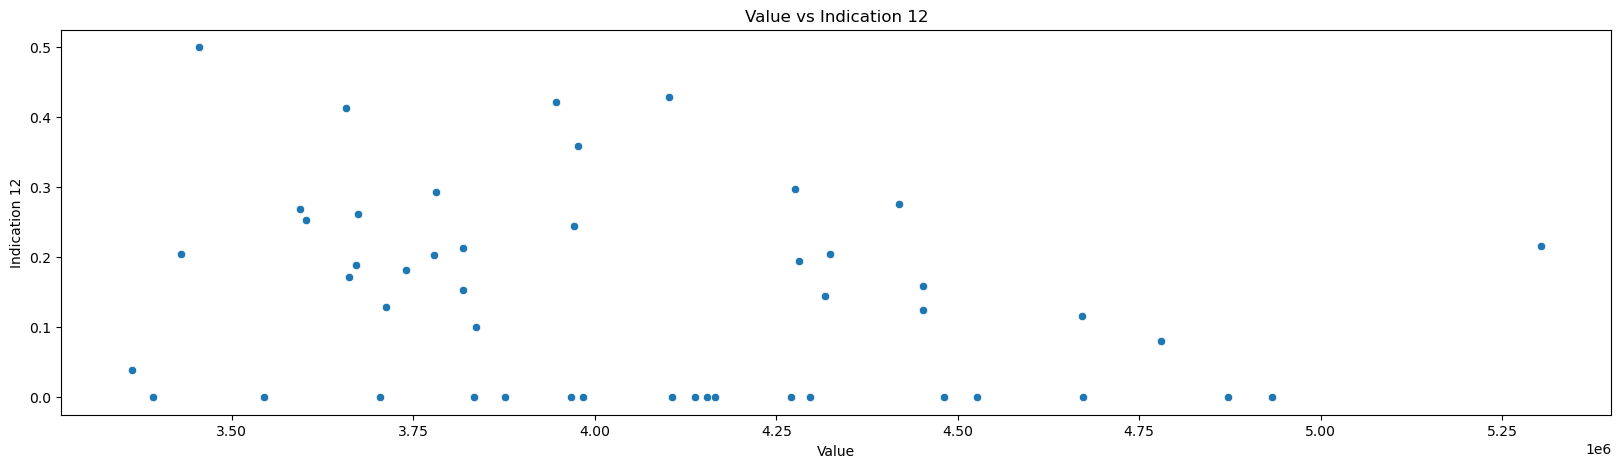

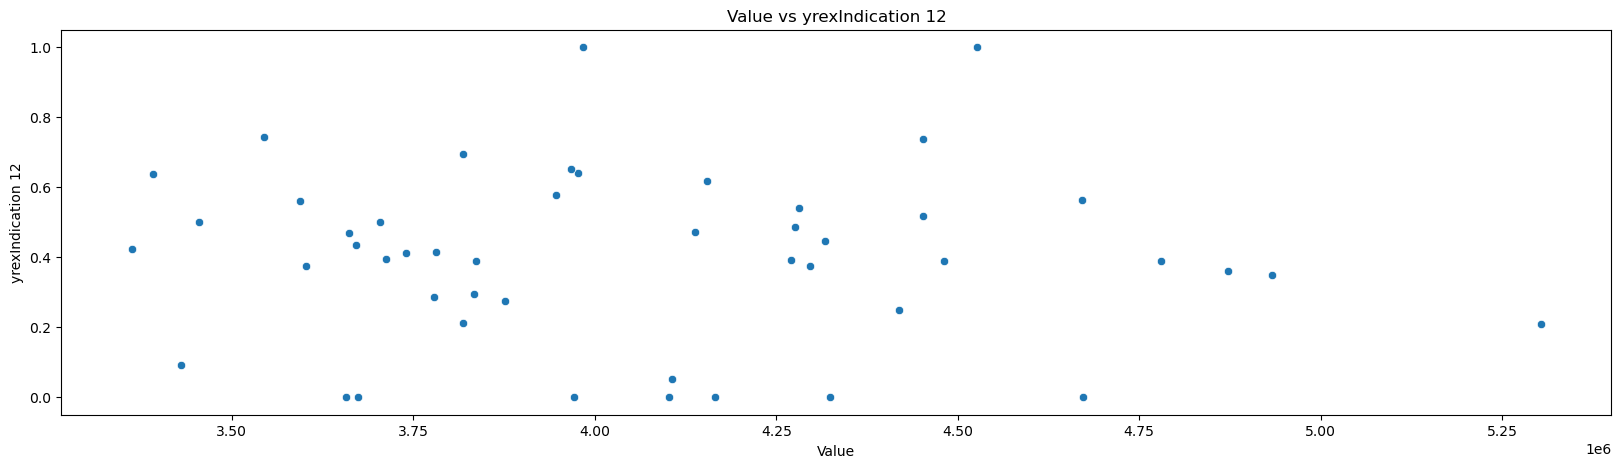

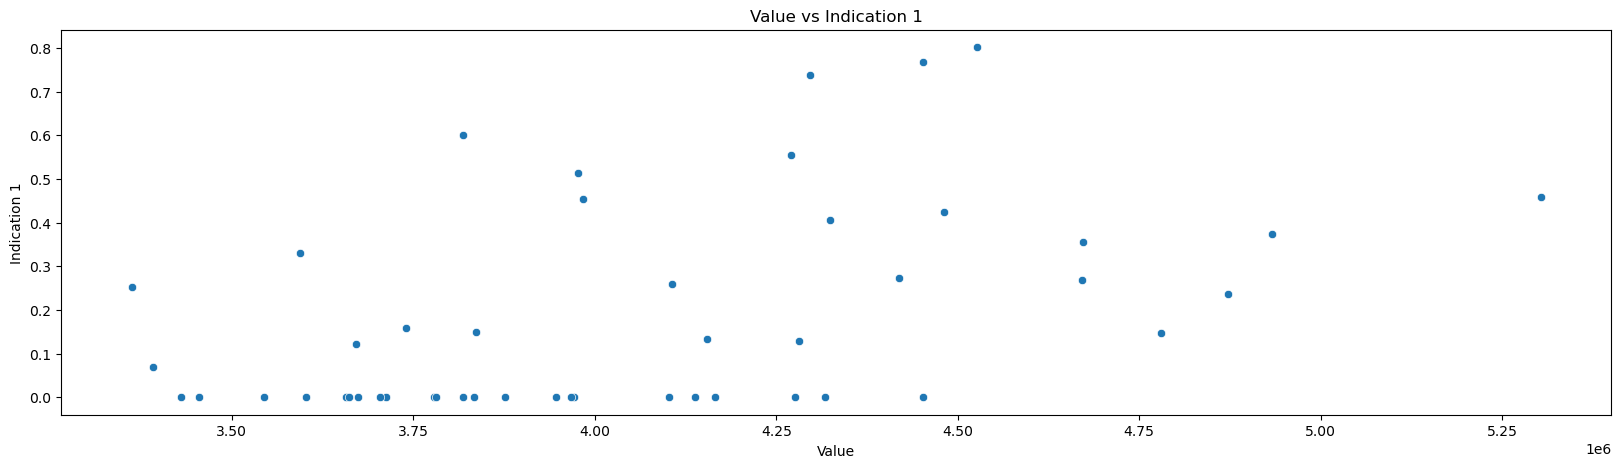

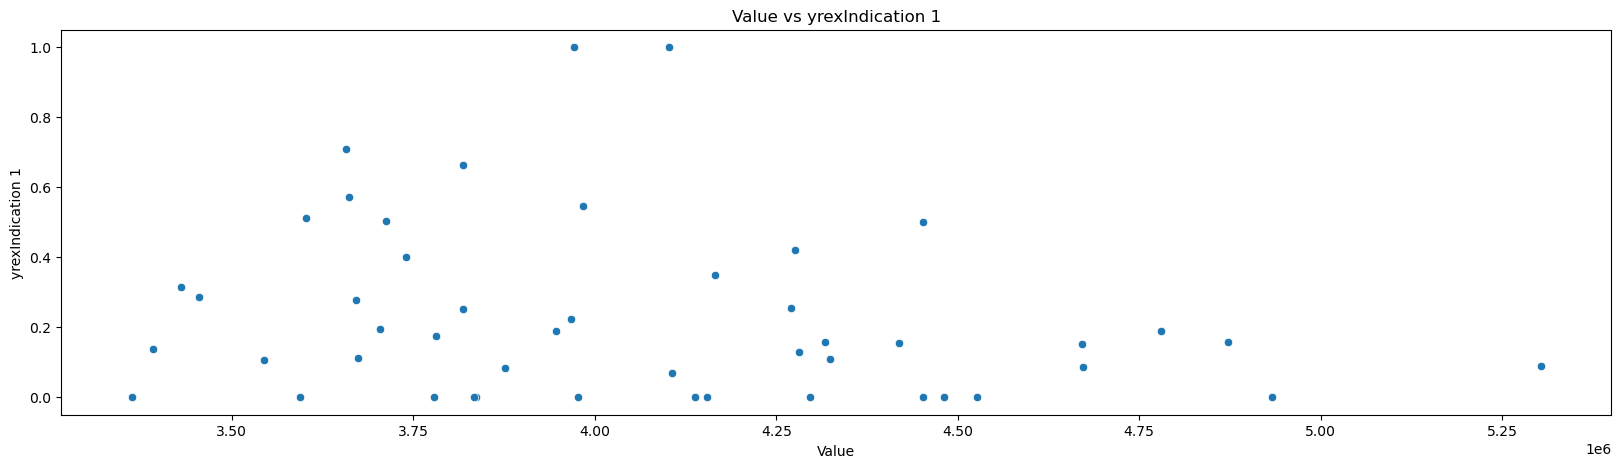

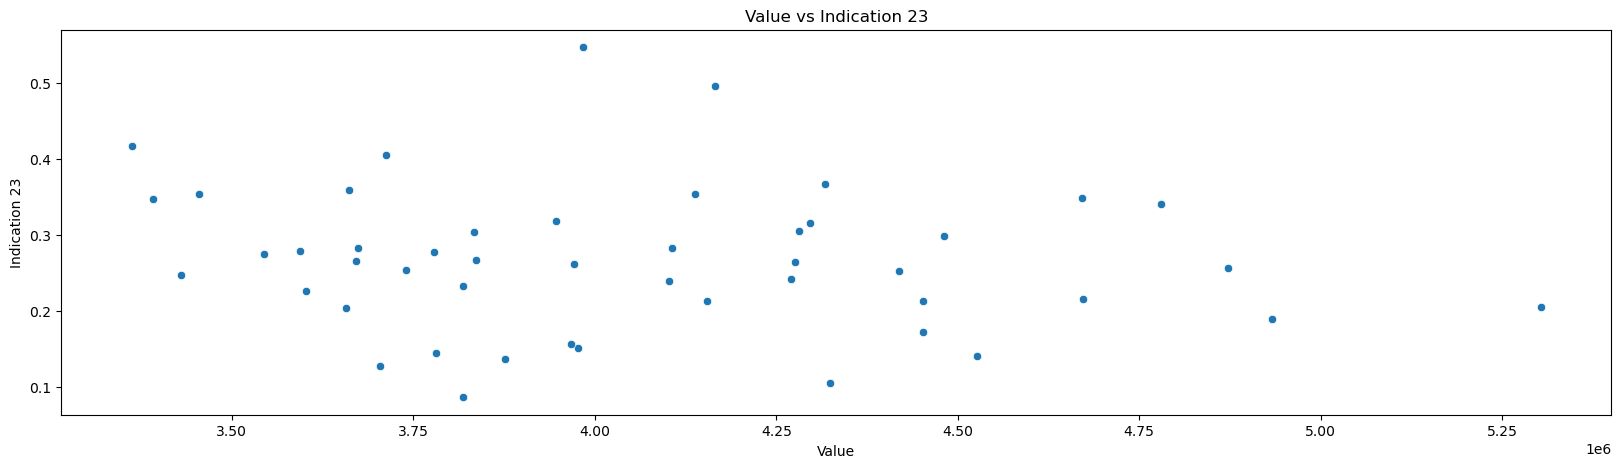

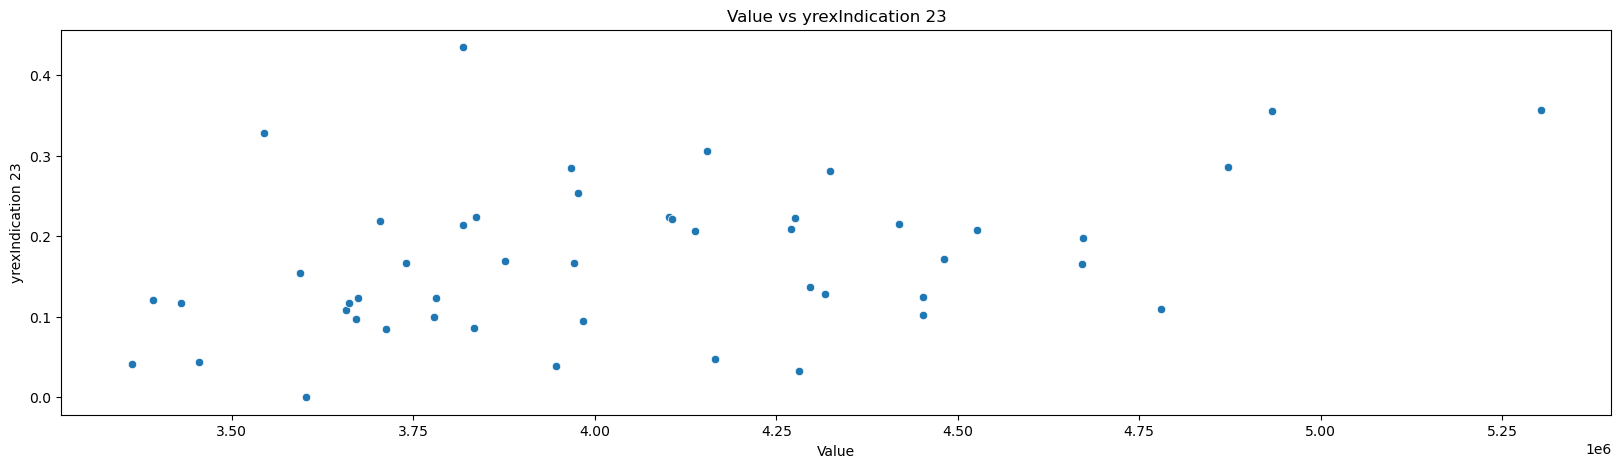

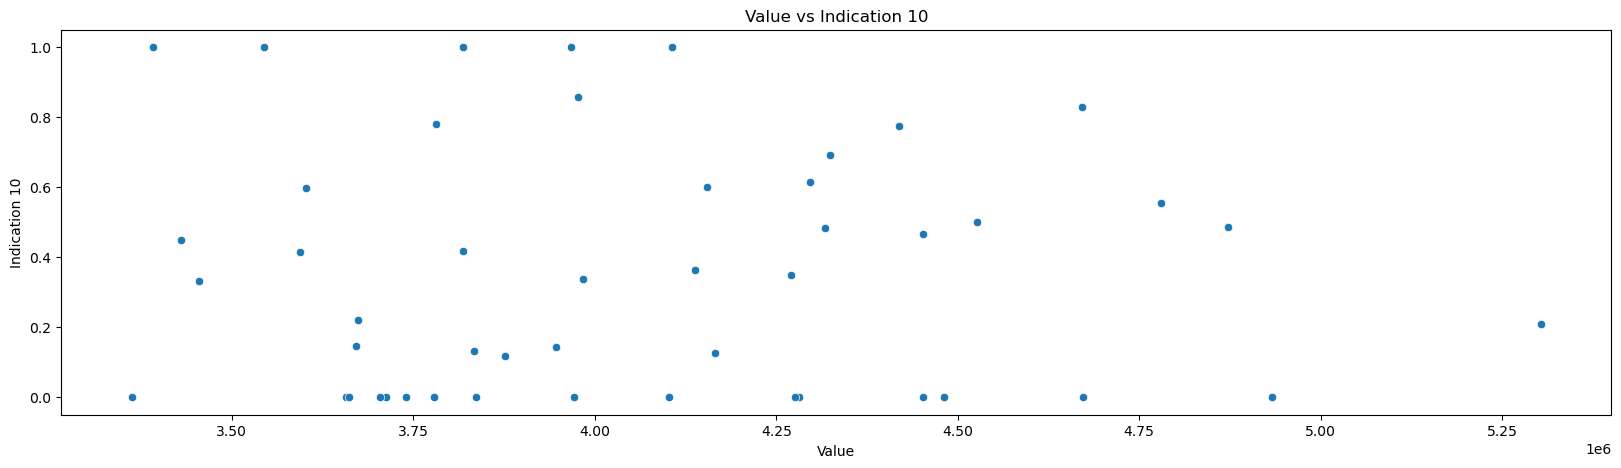

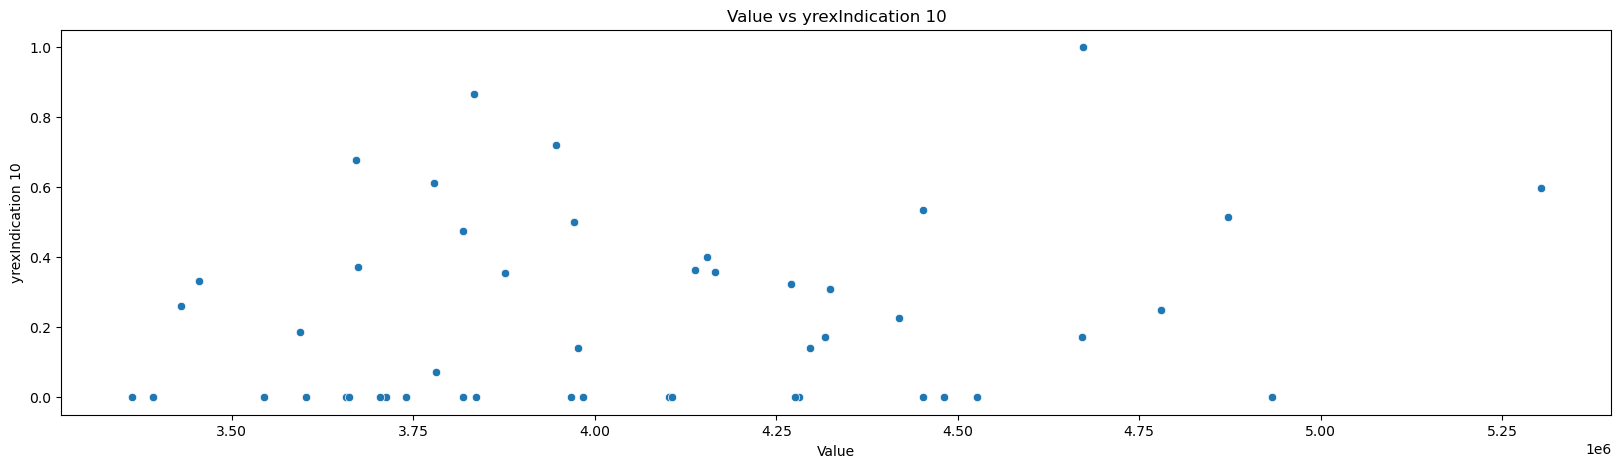

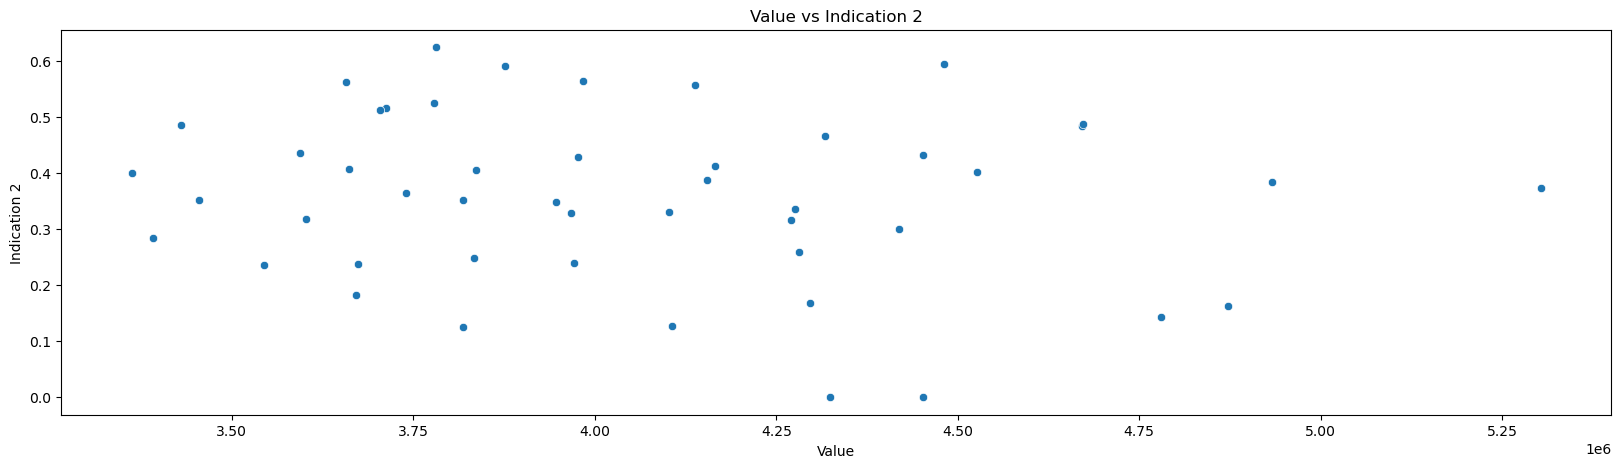

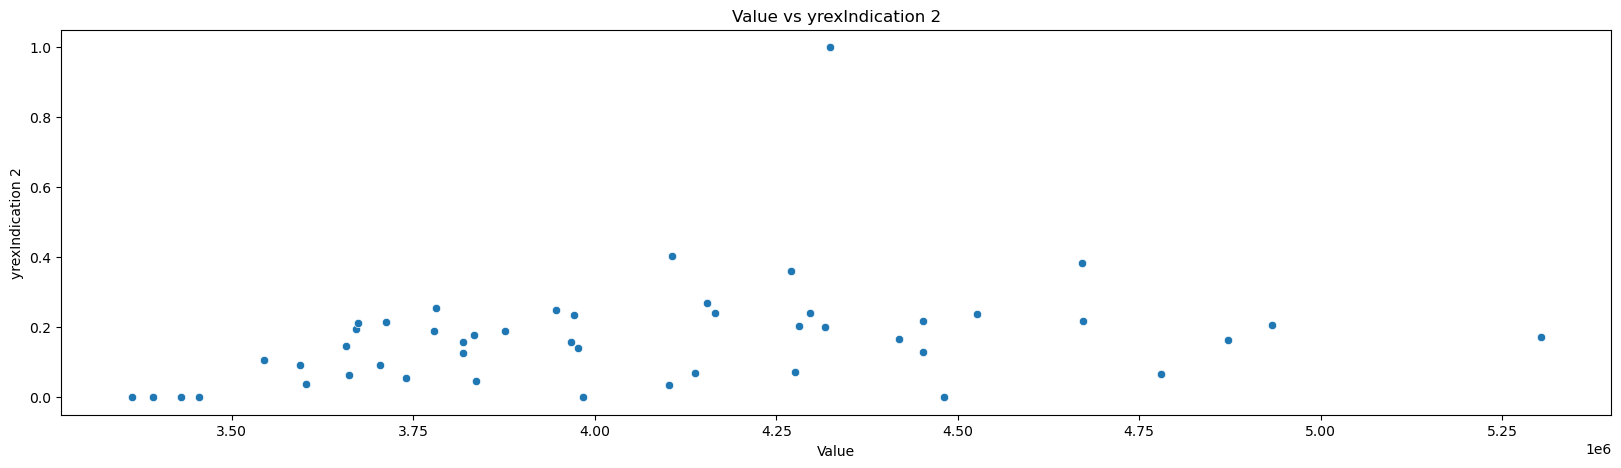

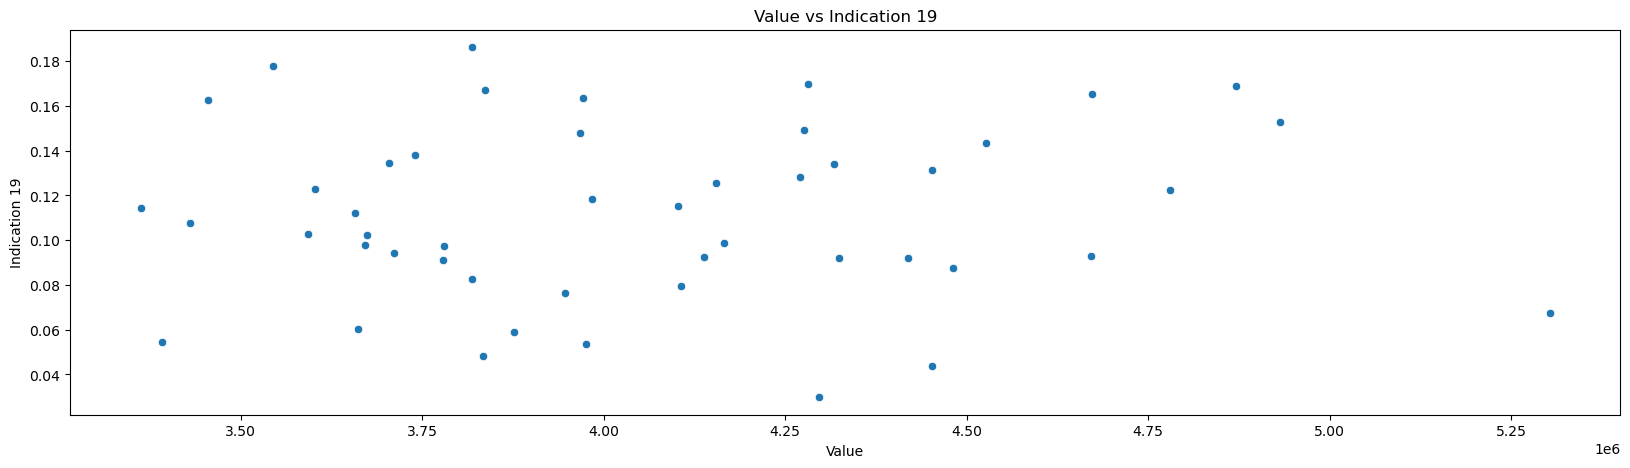

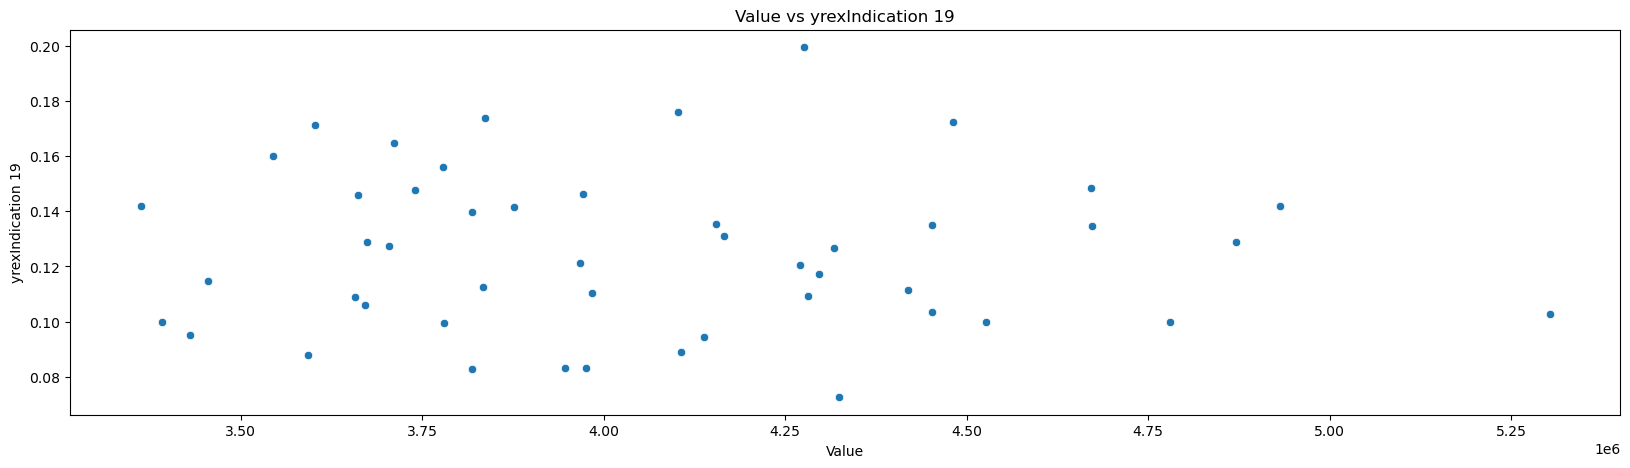

In [371]:
for column in df_pivoted.columns:
    plt.figure(figsize=(20,5))
    plt.title(f"Value vs {column}")
    sns.scatterplot(data=df_pivoted, x="Value", y=column)
    plt.show()

In [372]:
from sklearn.linear_model import LinearRegression

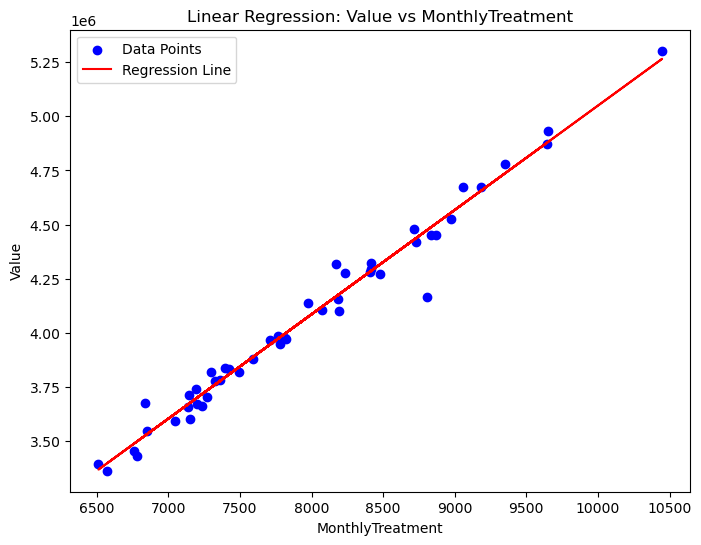

Regression for MonthlyTreatment:
  Coefficient (slope): 482.2885963530019
  Intercept: 226774.031246535



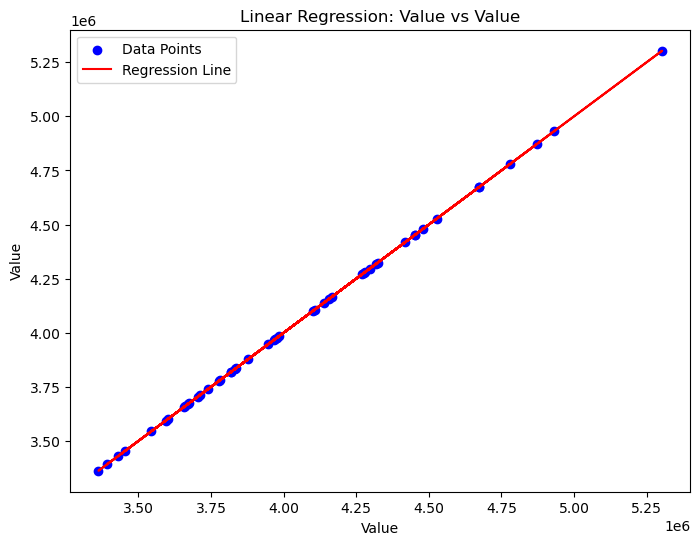

Regression for Value:
  Coefficient (slope): 1.0
  Intercept: 0.0



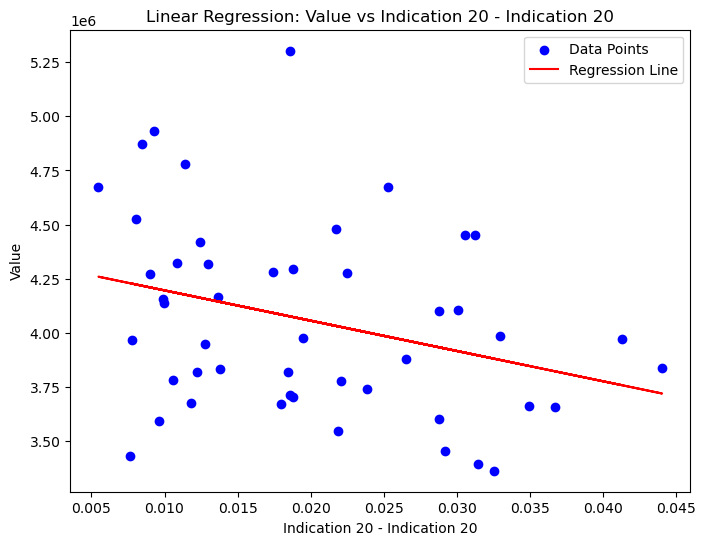

Regression for Indication 20 - Indication 20:
  Coefficient (slope): -14000072.591142757
  Intercept: 4335666.391017728



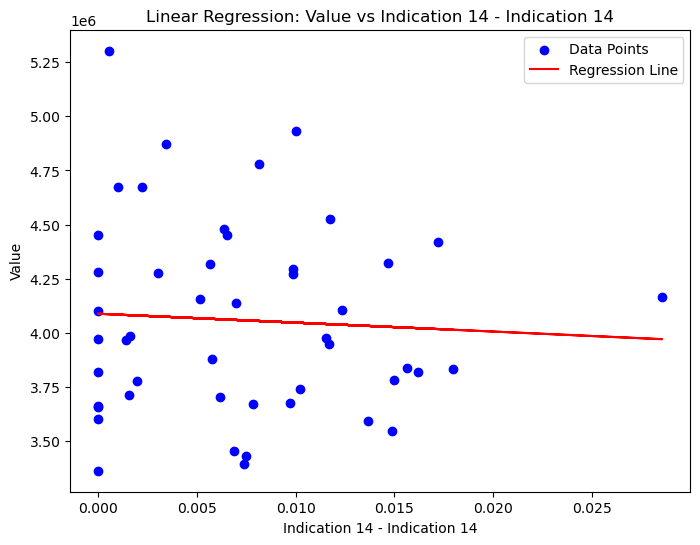

Regression for Indication 14 - Indication 14:
  Coefficient (slope): -4115464.7322615786
  Intercept: 4087697.861771856



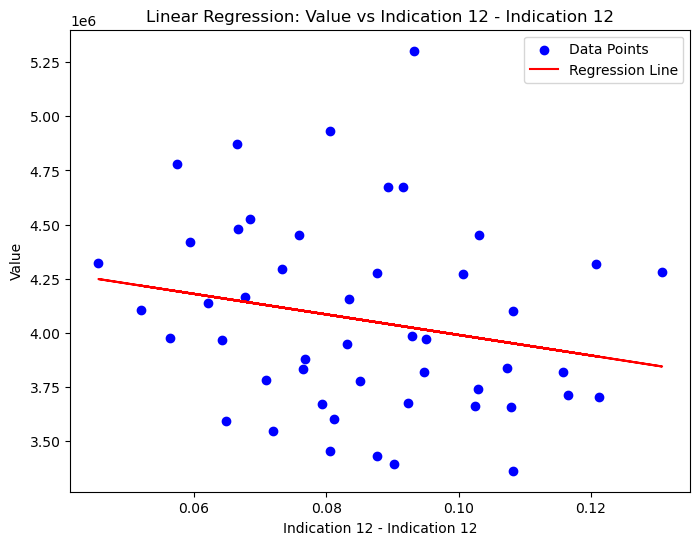

Regression for Indication 12 - Indication 12:
  Coefficient (slope): -4746439.662760078
  Intercept: 4464478.378451298



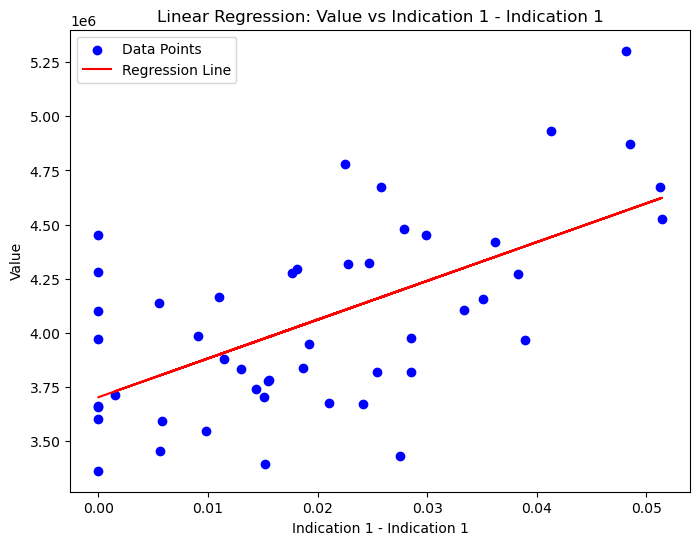

Regression for Indication 1 - Indication 1:
  Coefficient (slope): 17920314.342892684
  Intercept: 3701957.983110506



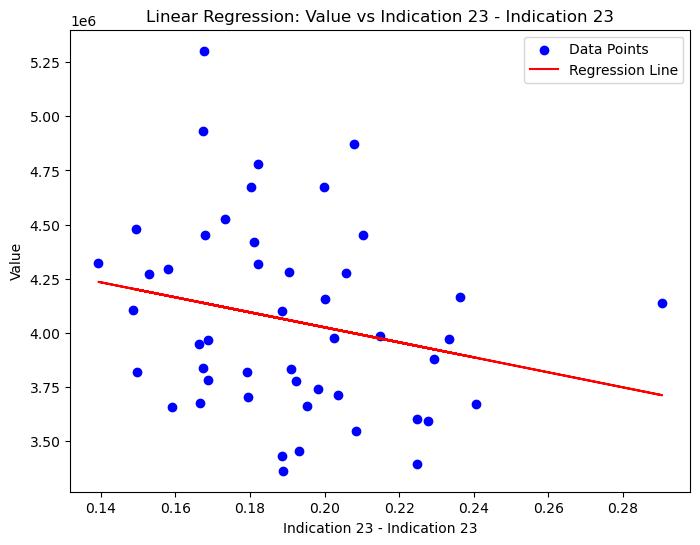

Regression for Indication 23 - Indication 23:
  Coefficient (slope): -3468404.313280266
  Intercept: 4718615.465386564



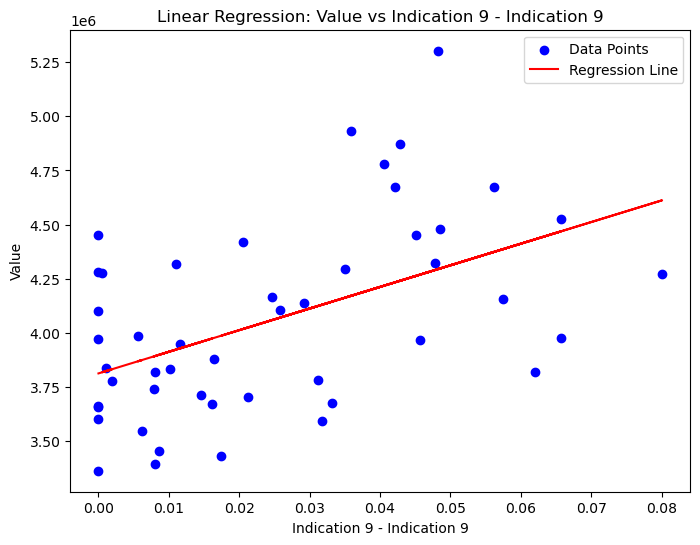

Regression for Indication 9 - Indication 9:
  Coefficient (slope): 9994807.478289489
  Intercept: 3811928.901426749



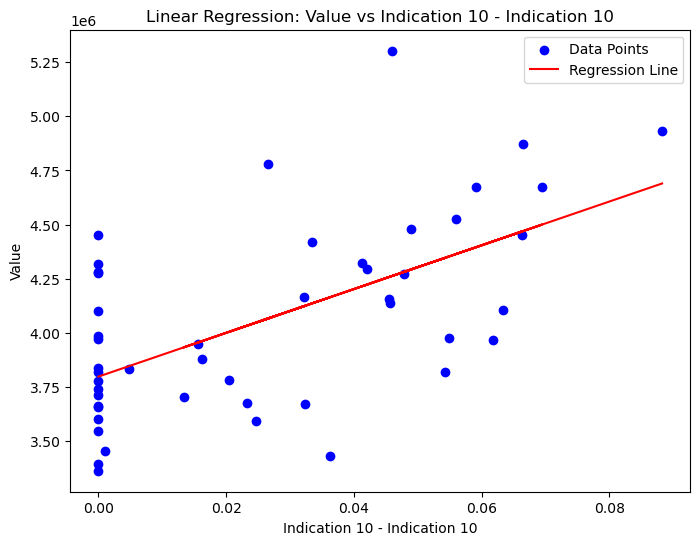

Regression for Indication 10 - Indication 10:
  Coefficient (slope): 10114849.983465223
  Intercept: 3797205.532157395



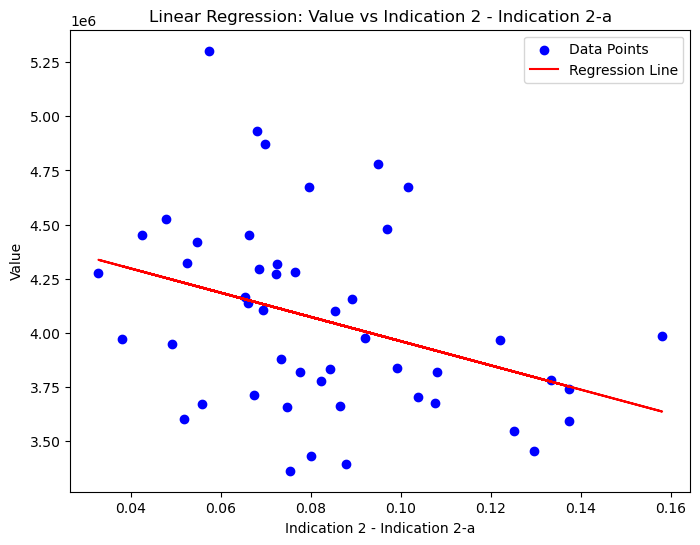

Regression for Indication 2 - Indication 2-a:
  Coefficient (slope): -5601502.779329996
  Intercept: 4520916.27265691



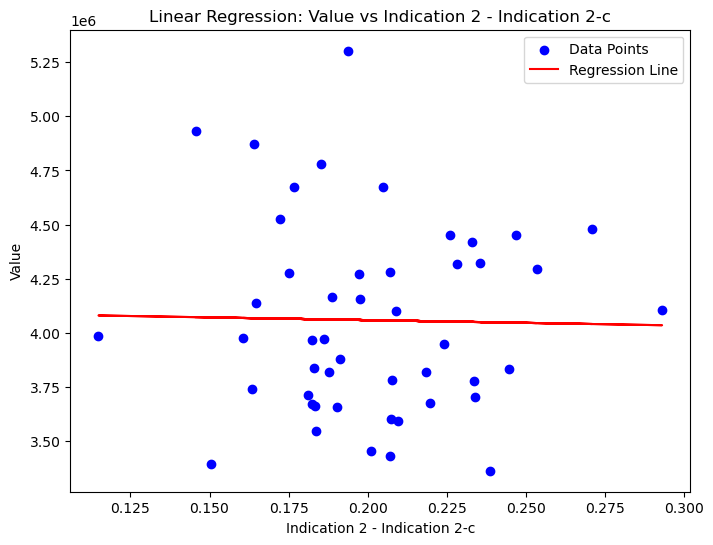

Regression for Indication 2 - Indication 2-c:
  Coefficient (slope): -253059.91340073853
  Intercept: 4108811.8769423584



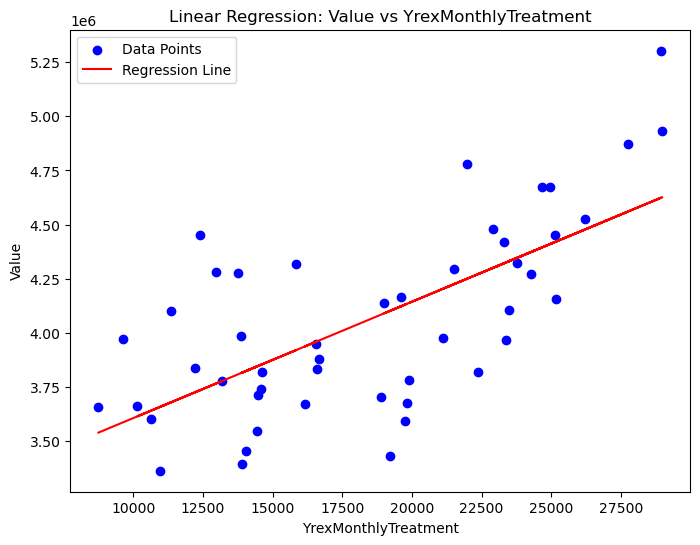

Regression for YrexMonthlyTreatment:
  Coefficient (slope): 53.78765596516991
  Intercept: 3067374.5262292586



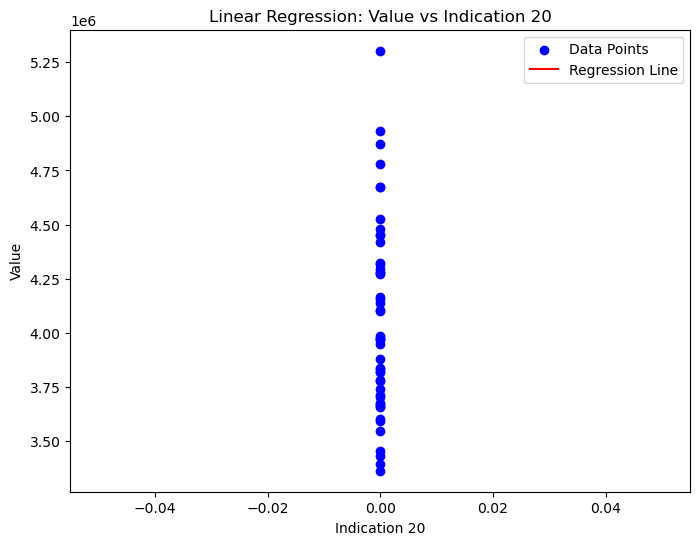

Regression for Indication 20:
  Coefficient (slope): 0.0
  Intercept: 4057903.75



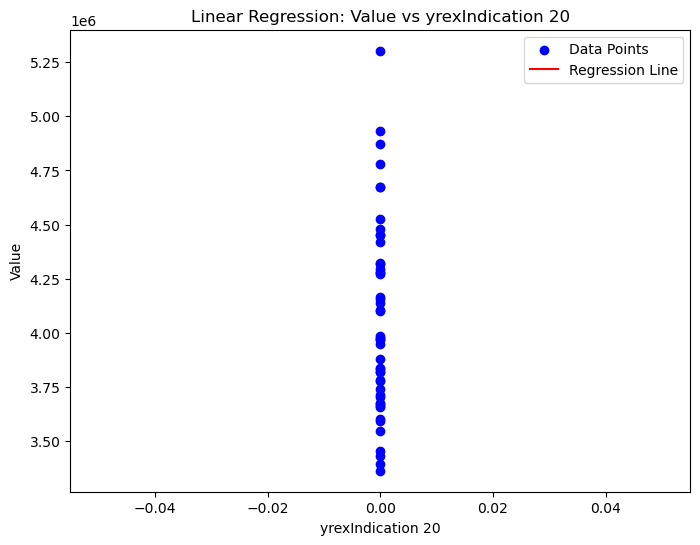

Regression for yrexIndication 20:
  Coefficient (slope): 0.0
  Intercept: 4057903.75



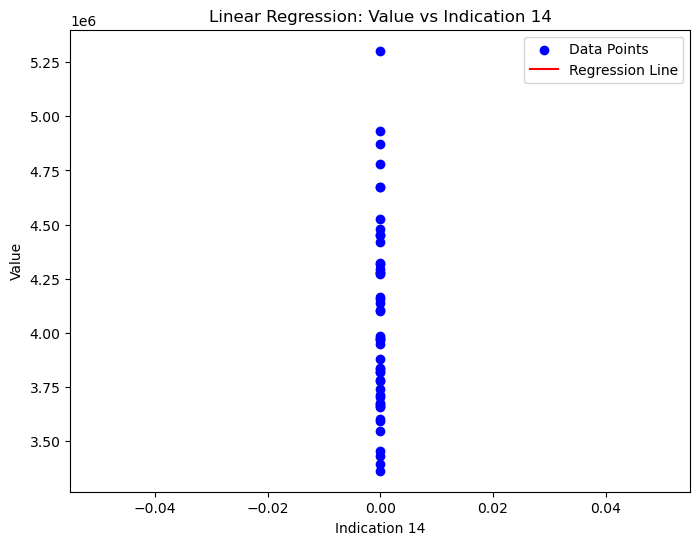

Regression for Indication 14:
  Coefficient (slope): 0.0
  Intercept: 4057903.75



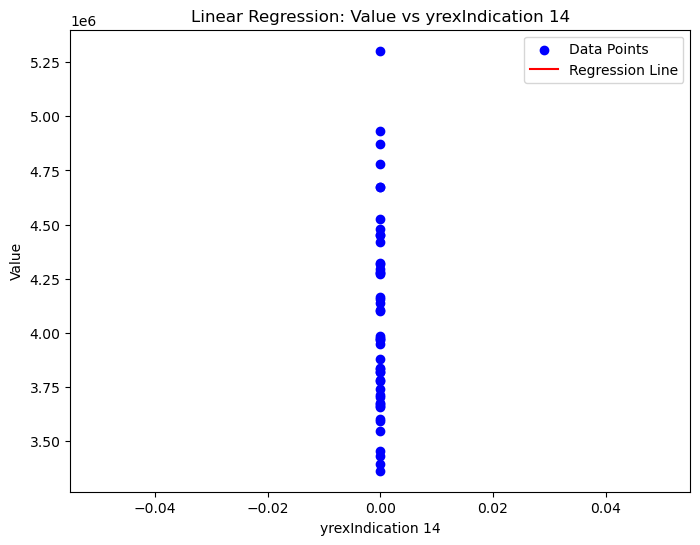

Regression for yrexIndication 14:
  Coefficient (slope): 0.0
  Intercept: 4057903.75



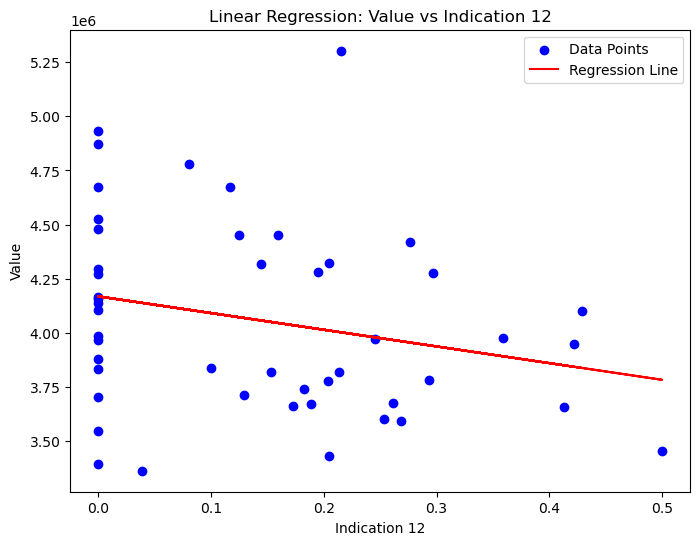

Regression for Indication 12:
  Coefficient (slope): -771005.6508798118
  Intercept: 4167817.694529076



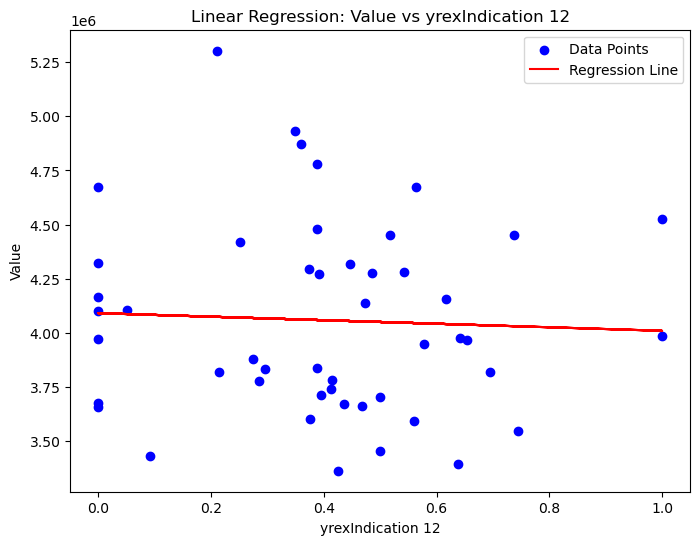

Regression for yrexIndication 12:
  Coefficient (slope): -81458.25802577581
  Intercept: 4090361.8280636007



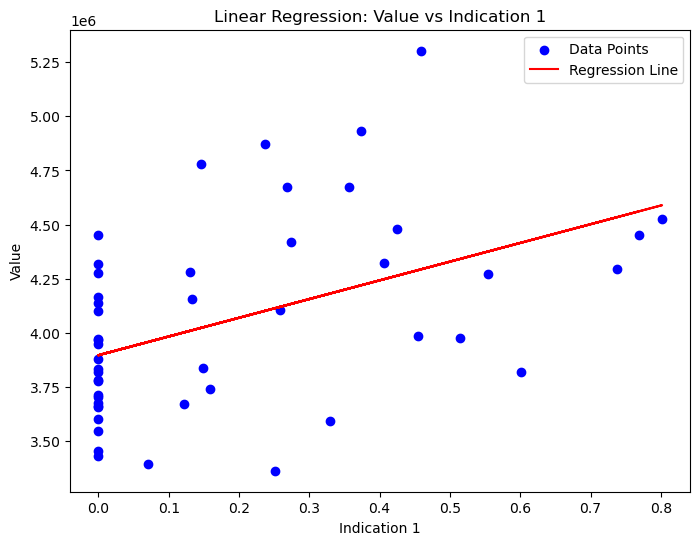

Regression for Indication 1:
  Coefficient (slope): 864826.498336393
  Intercept: 3896145.049651949



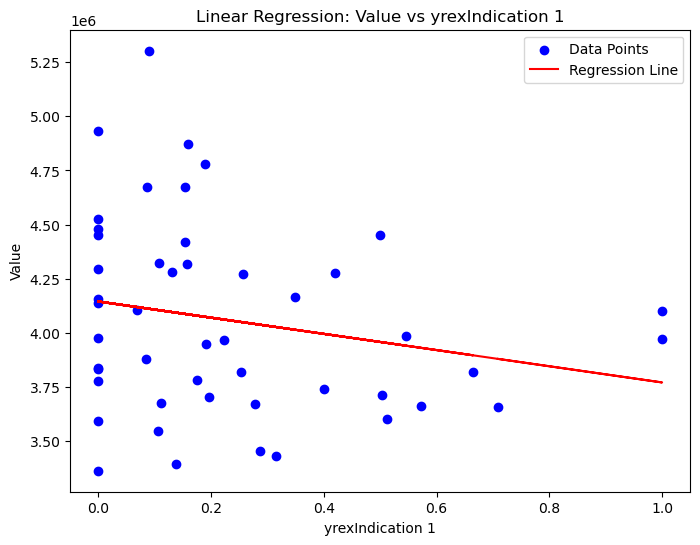

Regression for yrexIndication 1:
  Coefficient (slope): -374159.79595965304
  Intercept: 4144271.052282753



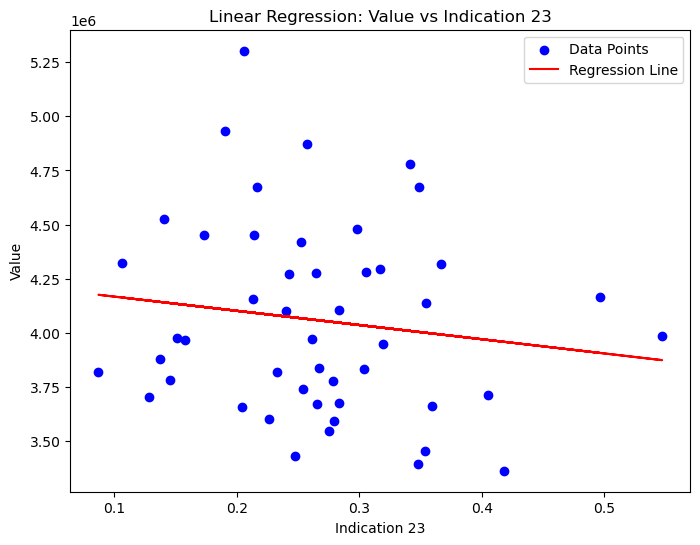

Regression for Indication 23:
  Coefficient (slope): -656560.6170264154
  Intercept: 4232495.772989004



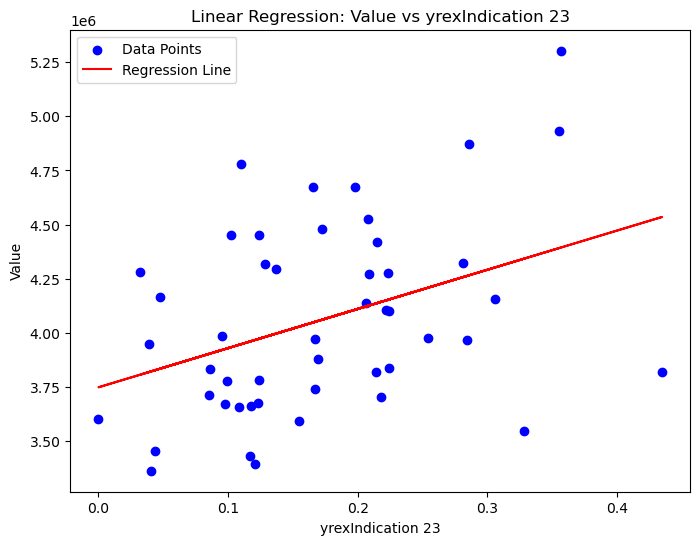

Regression for yrexIndication 23:
  Coefficient (slope): 1810893.9211877796
  Intercept: 3747701.3520656764



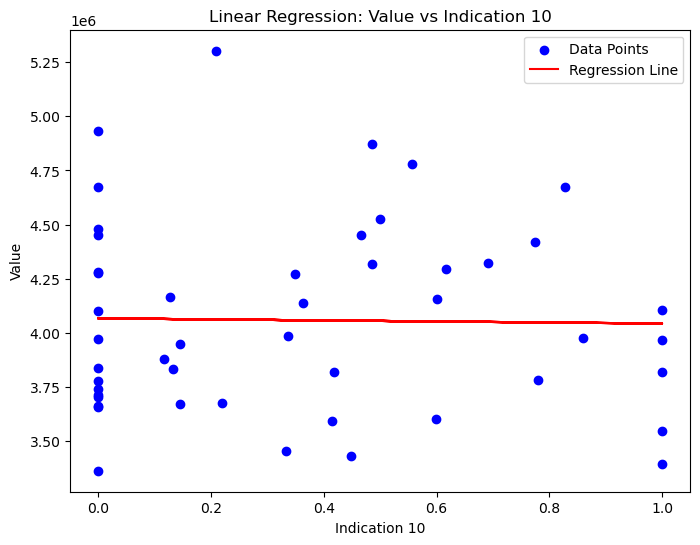

Regression for Indication 10:
  Coefficient (slope): -23829.6339643531
  Intercept: 4066340.936984253



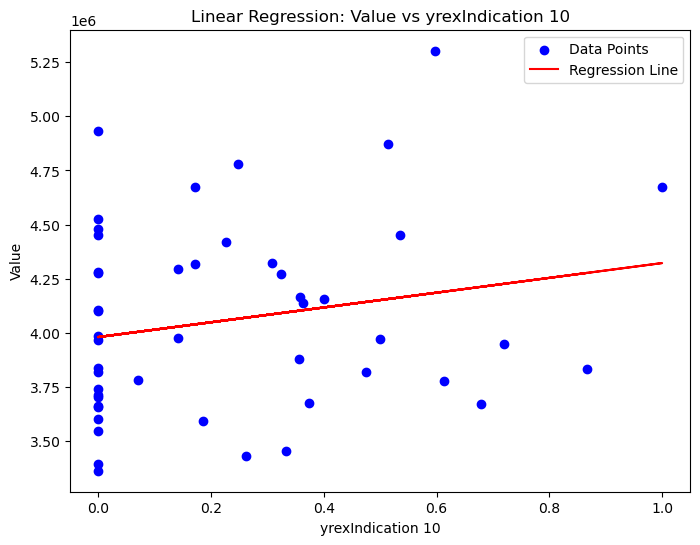

Regression for yrexIndication 10:
  Coefficient (slope): 341869.5020351469
  Intercept: 3980064.2111299075



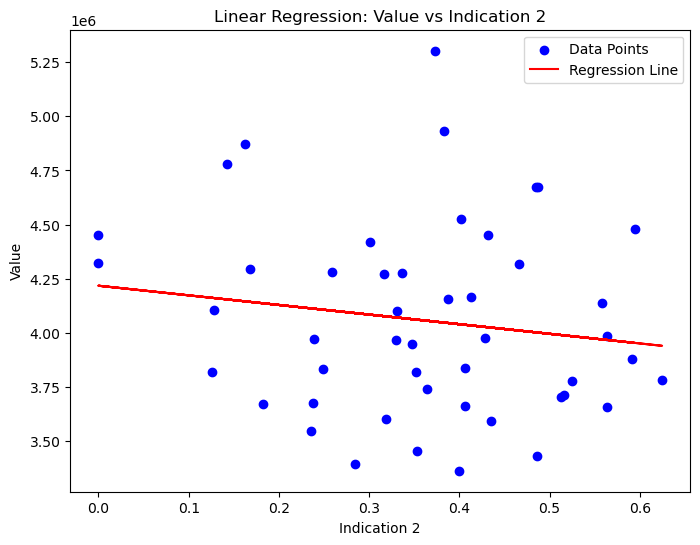

Regression for Indication 2:
  Coefficient (slope): -444601.37333695125
  Intercept: 4217215.2502001235



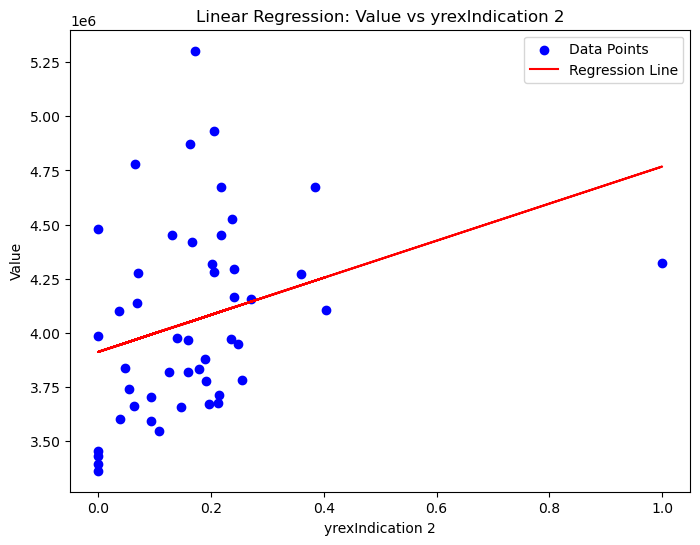

Regression for yrexIndication 2:
  Coefficient (slope): 856259.5686463254
  Intercept: 3911687.5266507654



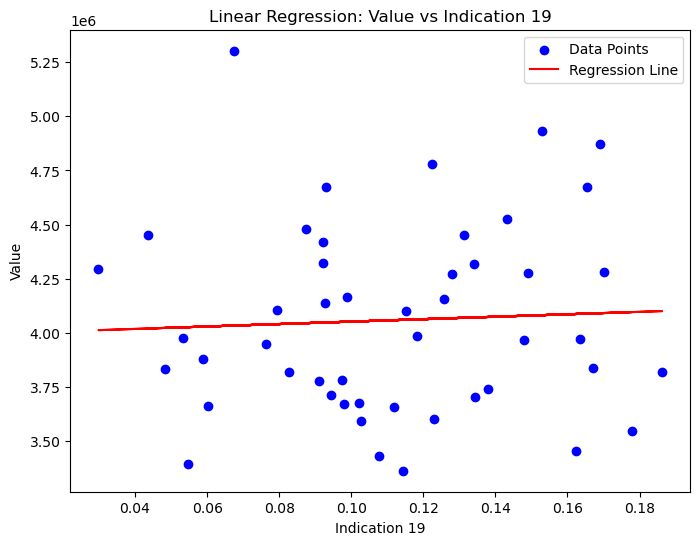

Regression for Indication 19:
  Coefficient (slope): 564295.4697191389
  Intercept: 3994936.1453177696



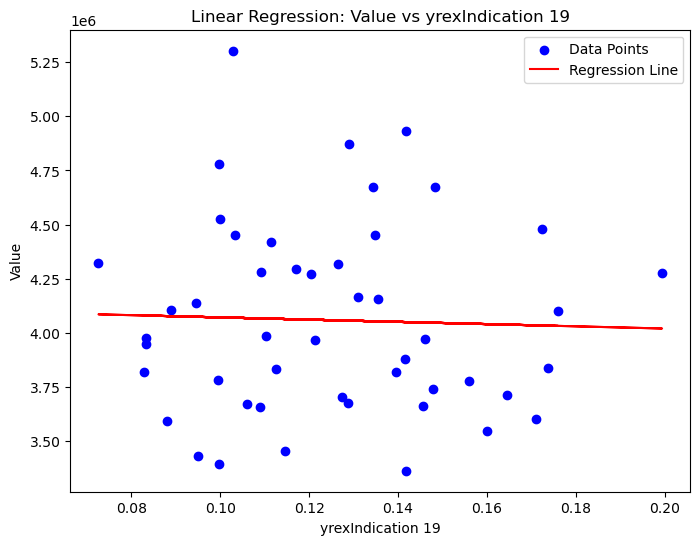

Regression for yrexIndication 19:
  Coefficient (slope): -515606.304220949
  Intercept: 4122340.3473310275



In [373]:
linear_regressions = {}

for idx, column in enumerate(df_pivoted.columns):
    X = df_pivoted[column].values.reshape(-1, 1)
    y = df_pivoted["Value"]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    linear_regressions[idx] = model

    # Predict using the model
    y_pred = model.predict(X)

    # Plotting the data points and the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of the original data
    plt.plot(X, y_pred, color='red', label='Regression Line')  # Regression line
    plt.xlabel(column)  # Label for the independent variable
    plt.ylabel('Value')  # Label for the dependent variable
    plt.title(f'Linear Regression: Value vs {column}')
    plt.legend()
    plt.show()

    # Print the slope (coefficient) and intercept of the regression line
    print(f"Regression for {column}:")
    print(f"  Coefficient (slope): {model.coef_[0]}")
    print(f"  Intercept: {model.intercept_}")
    print()

In [ ]:
def update_variables(step, regressions, idx_input_column, weights=None):
    """
    step: vector containing the information to be update
    regressions: mapping from input column to dependent variables. Dictionary of the type {idx: regression model}
    idx_input_column: index of the input column
    weights: weights for updating the vector
    """

    new_step = step.copy()
    
    if weights is None:
        weights = [(0.5,0.5)]*len(step)

    for idx in range(len(step)):
        if idx != idx_input_column:
            # The update value is the weighted sum of the forecasted value and the value obtained through the regression
            new_step[idx] = step[idx]*weights[idx][0] + regressions[idx].predict(step[idx].reshape(1, -1) )*weights[idx][1]

    return new_step
    

def inference_with_assumption(df, results, assumption, assumption_step, future_step, regressions, weights):
    """
        df: Dataframe with the historical data
        results: Weights of the VAR model
        assumption: Tuple of the shape (input variable index, input variable value)
        assumption_step: time step where the assumption is made. Minimum 1.
        future_step: number of future time steps after the assumption step
        regressions: mapping from input variable to dependent variable
        weights: weights for the update variables step
    """
    initial_forecast = results.forecast(df.values[-5:], steps=assumption_step)
    initial_forecast[-1][assumption[0]] = assumption[1]

    initial_forecast[-1] = update_variables(initial_forecast[-1], regressions, assumption[0], weights=weights) 

    forecast_df = pd.DataFrame(initial_forecast, columns=df_pivoted.columns)
    input_df = pd.concat([df_pivoted, forecast_df], ignore_index=True)

    output = results.forecast(input_df.values[-5:], steps=future_step)
    output_df = pd.DataFrame(output, columns=df_pivoted.columns)

    final_df = pd.concat([input_df, output_df], ignore_index=True)
    
    return final_df
    
    

In [ ]:
df_output = inference_with_assumption(df_pivoted, results, (1, 3.23163612e+06), 3, 3, linear_regressions, None)
display(df_output)

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# Example dataframe (replace this with your actual data)
# df_pivoted is your dataset, where rows are time steps and columns are different variables.
# df_pivoted = pd.read_csv('your_dataset.csv')

# Split into training and test data
train_size = int(len(df_pivoted) * 0.8)  # 80% for training, 20% for testing
train_data = df_pivoted[:train_size]
test_data = df_pivoted[train_size:]

# Fit the VAR model to the training data
model = VAR(train_data)

# Fit the model with a maximum number of lags (you can try different values)
maxlags = 5
results = model.fit(maxlags=maxlags)

# Print the summary to check model parameters
print(results.summary())


# Forecast the next 8 steps (since we have 48 rows, we will forecast 8 future rows)
forecast_steps = len(test_data)

# Forecasting the next 'forecast_steps' time steps based on the most recent training data
forecast = results.forecast(train_data.values[-maxlags:], steps=forecast_steps)

# Convert forecast to a DataFrame for better readability
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Print forecasted values
print(forecast_df)

# Calculate Mean Squared Error (MSE) between the forecasted and actual test data
mse = mean_squared_error(test_data.values, forecast)
print(f"Mean Squared Error: {mse}")

# Use AIC or BIC to select the optimal lag
lag_order = results.k_ar  # Get the optimal lag order chosen by the model
print(f"Optimal number of lags: {lag_order}")

In [374]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# Assume df_pivoted is your DataFrame with multivariate time series data
# df_pivoted = pd.read_csv('your_dataset.csv')

# Split into training and test sets (80% train, 20% test)
train_size = int(len(df_pivoted) * 0.8)  # 80% for training, 20% for testing
train_data = df_pivoted[:train_size]
test_data = df_pivoted[train_size:]

# Fit the VAR model to the training data
model = VAR(train_data)

# Fit the model with a maximum number of lags
maxlags = 5
results = model.fit(maxlags=maxlags)

# Forecast the next steps (length of test data)
forecast_steps = len(test_data)
forecast = results.forecast(train_data.values[-maxlags:], steps=forecast_steps)

# Convert the forecasted values to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(test_data.values, forecast)
print(f"Mean Squared Error: {mse}")

sqrt_mse = np.sqrt(mse)
print(f"Square root of the mean Squared Error: {sqrt_mse}")

# Optionally, check the optimal number of lags using AIC/BIC
lag_order = results.k_ar
print(f"Optimal lag order chosen by the model: {lag_order}")


Mean Squared Error: 36577296758.991776
Square root of the mean Squared Error: 191251.91962171718
Optimal lag order chosen by the model: 5


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


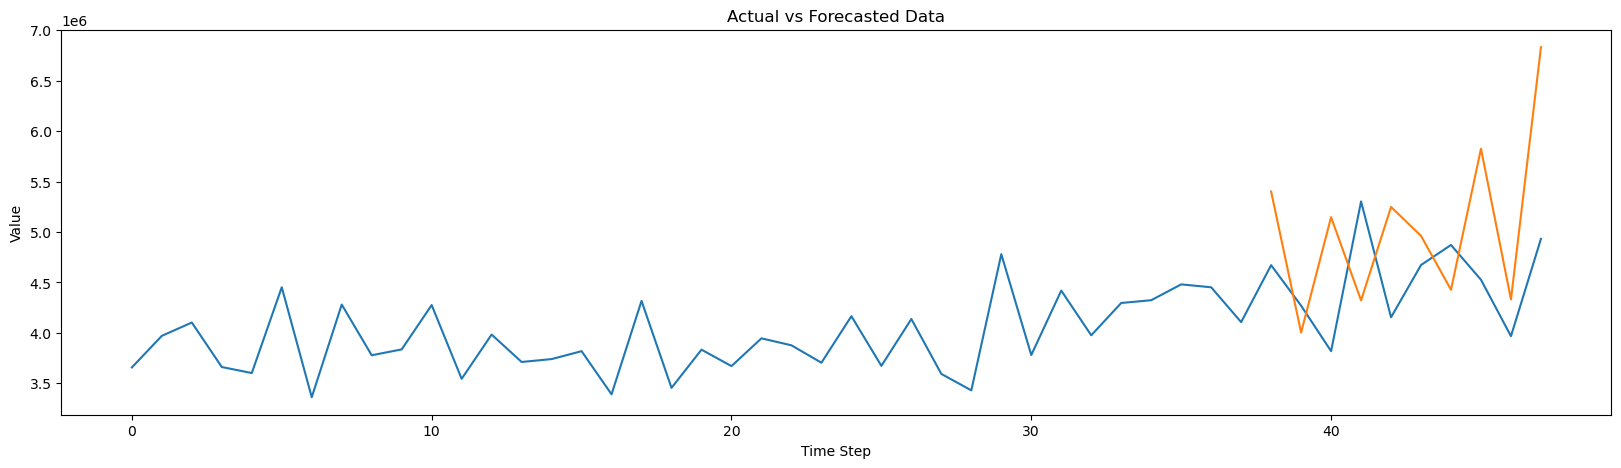

In [375]:
import matplotlib.pyplot as plt

# Create the figure and plot
plt.figure(figsize=(20, 5))

# Plot the test data and the forecasted data

real_values = [point[1] for point in df_pivoted.values]
forecast_values = [point[1] for point in forecast]

plt.plot(real_values, label='Actual Test Data')
plt.plot(range(len(train_data), len(train_data) + len(forecast_values)), forecast_values, label='Forecasted Data')



# Add title and labels
plt.title('Actual vs Forecasted Data')
plt.xlabel('Time Step')
plt.ylabel('Value')


# Display the plot
plt.show()


In [ ]:
    foresland_exfactor = pd.read_excel(Floresland_path, sheet_name='Ex-Factory volumes')
    foresland_demand= pd.read_excel(Floresland_path, sheet_name='Demand volumes')
    foresland_indication = pd.read_excel(Floresland_path, sheet_name='Indication split')